In [ ]:
from pykrx import stock
tickers_KOSPI = stock.get_index_ticker_list()
for i in tickers_KOSPI:
    y = stock.get_index_ticker_name(i)
    print(y)
print("-"*20)
tickers_KOSPI_market = stock.get_market_ticker_list()
for i in tickers_KOSPI_market:
    y = stock.get_market_ticker_name(i)
    print(y)
print("-"*20)
tickers_KOSPI_market = stock.get_etx_ticker_list()
for i in tickers_KOSPI_market:
    y = stock.get_market_ticker_name(i)
    print(y)

In [9]:
tickers_KOSDAK_market = ['265520', '035760', '058820', '195940', '028300', '067630', '035900', '035600', '060720', '108320', '060250', '030190', '218410', '151910', '036540', '098460', '078130', '035080', '007390', '033640', '119860', '032190', '068240', '045390', '078600', '213420', '194480', '086450', '005290', '025900', '131970', '141080', '058470', '267980', '215200', '235980', '086900', '140410', '080160', '053030', '064550', '323990', '090460', '100090', '000250', '038500', '038540', '089980', '006730', '092190', '046890', '178320', '015750', '299660', '268600', '068760', '091990', '357780', '036830', '253450', '222800', '222080', '096530', '025980', '092040', '084850', '027360', '067160', '053800', '131370', '196170', '293780', '101490', '056190', '041510', '237690', '298380', '088800', '230360', '086520', '247540', '383310', '036810', '183490', '061970', '290650', '066970', '033310', '039200', '138080', '122870', '041190', '240810', '074600', '104830', '030530', '069080', '112040', '018000', '206650', '023410', '084370', '272290', '078020', '102710', '039030', '060150', '048530', '095700', '204270', '082270', '036930', '144510', '085660', '278280', '293490', '042000', '078340', '214370', '032500', '052400', '290510', '183300', '041960', '029960', '033290', '200130', '294570', '214150', '095610', '108230', '064760', '131290', '104480', '034230', '214450', '140860', '091700', '263750', '022100', '319660', '137400', '166090', '003380', '256840', '084990', '048410', '243070', '084110', '145020']
tickers_KOSPI_market = ['282330', '138930', '001040', '079160', '000120', '097950', '005830', '000990', '000210', '375500', '114090', '078930', '006360', '007070', '294870', '267250', '011200', '105560', '002380', '016380', '030200', '033780', '003550', '034220', '051900', '373220', '032640', '011070', '066570', '051910', '079550', '006260', '010120', '001120', '035420', '005940', '010060', '178920', '005490', '010950', '034730', '011790', '001740', '006120', '302440', '326030', '402340', '361610', '096770', '285130', '017670', '000660', '064960', '069260', '035250', '010130', '011780', '073240', '000270', '024110', '002350', '251270', '006280', '005250', '004370', '001680', '047040', '042660', '003090', '069620', '006650', '001440', '003490', '192080', '001230', '026960', '006040', '014820', '000150', '241560', '034020', '336260', '032350', '023530', '004000', '004990', '005300', '011170', '204320', '138040', '008560', '009900', '006800', '003850', '003000', '006400', '028260', '207940', '032830', '018260', '028050', '009150', '005930', '010140', '016360', '029780', '000810', '000070', '004490', '068270', '004170', '031430', '019170', '055550', '003410', '112610', '002790', '090430', '020560', '010780', '005850', '012750', '036570', '111770', '003520', '000670', '007310', '271560', '001800', '316140', '000100', '139480', '020150', '030000', '185750', '013890', '035720', '323410', '377300', '192820', '120110', '021240', '192400', '284740', '259960', '039490', '003240', '028670', '047050', '003670', '103140', '086790', '352820', '000080', '036460', '071050', '000240', '015760', '009540', '161890', '161390', '047810', '008930', '128940', '009240', '020000', '105630', '014680', '018880', '009420', '051600', '052690', '180640', '000880', '088350', '009830', '272210', '012450', '000720', '005440', '086280', '042670', '064350', '012330', '010620', '069960', '017800', '011210', '004020', '329180', '005380', '001450', '057050', '008770', '241590', '004800', '298050', '298020', '093370', '081660']
tickers = {}
for i in tickers_KOSPI_market:
    ticker_name = stock.get_market_ticker_name(i)
    tickers[i] = ticker_name
for j in tickers_KOSDAK_market:
    ticker_name = stock.get_market_ticker_name(j)
    tickers[j] = ticker_name

file = open('DB/ticker_K.json','w',encoding='utf-8')
file.write(str(tickers))

6577

In [ ]:
from DB.quantvis import Quantvis
import re
quantvis = Quantvis()
res_list=[]
res = quantvis.select_All_table()
print(type(res))
for r in res:
    res_list.append(r[0])
tickers_F_list = []
for lis in res_list :
    if re.search('^k[0-9]+',lis) != None:
        res_list.remove(lis)
    else:
        tickers_F_list.append(lis)
ticker_names_F = []
for k in tickers_F_list:
    ticker = quantvis.select_ticker_name(k)
    if type(ticker) == None:
        pass
    else:
        print(ticker[0])

In [29]:
from DB.portfolioDB import Portfolio
import re
port = Portfolio()
res = port.select_port('test2_pfname')
F_stock={'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'company':[],'code':[],'price':[],'stocks':[]}
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
F_total_price=0
K_total_price=0
for i in range(len(F_stock['price'])):
    F_total_price += float(F_stock['price'][i])*float(F_stock['stocks'][i])
for i in range(len(K_stock['price'])):
    K_total_price += float(K_stock['price'][i])*float(K_stock['stocks'][i])
K_total_price_fi = round(K_total_price + round(F_total_price*1254.4,2))
F_total_price_fi = round(F_total_price + round(K_total_price/1254.4,2))



select:test2_pfname


In [6]:
from flask_login import UserMixin
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
from DB.portfolioDB import Portfolio
def get_data_now(code):
    url = f"https://finance.naver.com/item/main.naver?code={code}"
    with urlopen(url) as doc:
        if doc is None:
            return None
        html = BeautifulSoup(doc, "html.parser")
        today = html.select_one('p.no_today > em > span.blind').text
        exday_ico = html.select('p.no_exday > em > span.ico')[0].text
        #exday_per = html.select('p.no_exday > em > span.blind')[1].text
        #exday = exday_ico + exday_per
        # print(type(today))
        # print(today)
        print(type(exday))
        print(exday_ico)
get_data_now('105560')

<class 'str'>
보합


In [ ]:
from flask_login import UserMixin
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
from DB.portfolioDB import Portfolio

tickers_KOSDAK_market = ['265520', '035760', '058820', '195940', '028300', '067630', '035900', '035600', '060720', '108320', '060250', '030190', '218410', '151910', '036540', '098460', '078130', '035080', '007390', '033640', '119860', '032190', '068240', '045390', '078600', '213420', '194480', '086450', '005290', '025900', '131970', '141080', '058470', '267980', '215200', '235980', '086900', '140410', '080160', '053030', '064550', '323990', '090460', '100090', '000250', '038500', '038540', '089980', '006730', '092190', '046890', '178320', '015750', '299660', '268600', '068760', '091990', '357780', '036830', '253450', '222800', '222080', '096530', '025980', '092040', '084850', '027360', '067160', '053800', '131370', '196170', '293780', '101490', '056190', '041510', '237690', '298380', '088800', '230360', '086520', '247540', '383310', '036810', '183490', '061970', '290650', '066970', '033310', '039200', '138080', '122870', '041190', '240810', '074600', '104830', '030530', '069080', '112040', '018000', '206650', '023410', '084370', '272290', '078020', '102710', '039030', '060150', '048530', '095700', '204270', '082270', '036930', '144510', '085660', '278280', '293490', '042000', '078340', '214370', '032500', '052400', '290510', '183300', '041960', '029960', '033290', '200130', '294570', '214150', '095610', '108230', '064760', '131290', '104480', '034230', '214450', '140860', '091700', '263750', '022100', '319660', '137400', '166090', '003380', '256840', '084990', '048410', '243070', '084110', '145020']
tickers_KOSPI_market = ['282330', '138930', '001040', '079160', '000120', '097950', '005830', '000990', '000210', '375500', '114090', '078930', '006360', '007070', '294870', '267250', '011200', '105560', '002380', '016380', '030200', '033780', '003550', '034220', '051900', '373220', '032640', '011070', '066570', '051910', '079550', '006260', '010120', '001120', '035420', '005940', '010060', '178920', '005490', '010950', '034730', '011790', '001740', '006120', '302440', '326030', '402340', '361610', '096770', '285130', '017670', '000660', '064960', '069260', '035250', '010130', '011780', '073240', '000270', '024110', '002350', '251270', '006280', '005250', '004370', '001680', '047040', '042660', '003090', '069620', '006650', '001440', '003490', '192080', '001230', '026960', '006040', '014820', '000150', '241560', '034020', '336260', '032350', '023530', '004000', '004990', '005300', '011170', '204320', '138040', '008560', '009900', '006800', '003850', '003000', '006400', '028260', '207940', '032830', '018260', '028050', '009150', '005930', '010140', '016360', '029780', '000810', '000070', '004490', '068270', '004170', '031430', '019170', '055550', '003410', '112610', '002790', '090430', '020560', '010780', '005850', '012750', '036570', '111770', '003520', '000670', '007310', '271560', '001800', '316140', '000100', '139480', '020150', '030000', '185750', '013890', '035720', '323410', '377300', '192820', '120110', '021240', '192400', '284740', '259960', '039490', '003240', '028670', '047050', '003670', '103140', '086790', '352820', '000080', '036460', '071050', '000240', '015760', '009540', '161890', '161390', '047810', '008930', '128940', '009240', '020000', '105630', '014680', '018880', '009420', '051600', '052690', '180640', '000880', '088350', '009830', '272210', '012450', '000720', '005440', '086280', '042670', '064350', '012330', '010620', '069960', '017800', '011210', '004020', '329180', '005380', '001450', '057050', '008770', '241590', '004800', '298050', '298020', '093370', '081660']
t_list = tickers_KOSPI_market + tickers_KOSDAK_market
port = Portfolio()
price_list = []
for i in t_list:
    today,exday=port.get_data_now(i)
    print(i)
    price_list.append(today)

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib, pymysql, calendar, time, json
from urllib.request import urlopen
from datetime import datetime
from threading import Timer
import pymysql
from pandas_datareader import data as pdr 
import yfinance as yf 
import re
import math
from datetime import date

class DBUpdater:
    def __init__(self):
        # 생성자 DB연결 및 종목코드 딕셔너리 생성
        config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
        }
        self.conn = pymysql.connect(**config)
        with self.conn.cursor() as curs:
            sql = """
            CREATE TABLE IF NOT EXISTS company_info (
                code VARCHAR(20) primary key,
                company VARCHAR(40),
                last_update DATE
            )
            """
            curs.execute(sql)
            
            sql = """
            CREATE TABLE IF NOT EXISTS daily_price (
                code varchar(20),
                date date,
                open int(20),
                high int(20),
                low int(20),
                close int(20),
                diff int(20),
                volume int(20),
                primary key (code, date)
            )
            """
            curs.execute(sql)
        self.conn.commit()
        self.codes = dict()
            
    def __del__(self):
        # 소멸자 : DB연결 해제
        self.conn.close()
    
    def read_krx_code(self):
        # KRX로부터 상장기업 목록 파일을 읽어와서 데이터 프레임으로 반환
        url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
            'download&searchType=13'
        krx = pd.read_html(url, header=0)[0]
        krx = krx[['종목코드','회사명']]
        krx = krx.rename(columns={'종목코드':'code','회사명':'company'})
        krx.code = krx.code.map('{:06d}'.format)
        return krx
    
    def update_comp_info(self):
        # 종목코드를 company_info 테이블에 업데이트한 후 딕셔너리에 저장
        sql = "SELECT * FROM company_info"
        df = pd.read_sql(sql, self.conn)
        for idx in range(len(df)):
            self.codes[df['code'].values(idx)] = df['company'].values[idx]
            
        with self.conn.cursor() as curs:
            sql = "SELECT max(last_update) FROM company_info"
            curs.execute(sql)
            rs = curs.fetchone()
            today = datetime.today().strftime('%Y-%m-%d')
            
            if rs[0] == None or rs[0].strftime('%Y-%m-%d') < today:
                krx = self.read_krx_code()
                for idx in range(len(krx)):
                    code = krx.code.values[idx]
                    company = krx.company.values[idx]
                    sql = f"REPLACE INTO company_info (code, company, last"\
                        f"_update) VALUES ('{code}', '{company}', '{today}')"
                    curs.execute(sql)
                    self.codes[code] = company
                    tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
                    print(f"[{tmnow}] #{idx+1:04d} REPLACE INTO company_info"\
                        f"VALUES ({code}, {company}, {today})")
                self.conn.commit()
                print()
    def read_naver(self, code, company, pages_to_fetch):
        # 네이버에서 주식 시세를 읽어서 데이터프레임으로 반환
        try:
            url = f"http://finance.naver.com/item/sise_day.nhn?code={code}"
            with urlopen(url) as doc:
                if doc is None:
                    return None
                html = BeautifulSoup(doc, "lxml")
                pgrr = html.find("td",class_="pgRR")
                if pgrr is None:
                    return None
                s = str(pgrr.a["href"]).split('=')
                lastpage = s[-1]
            df = pd.DataFrame()
            pages = min(int(lastpage), pages_to_fetch)
            for page in range(1, pages + 1):
                pg_url = '{}&page={}'.format(url, page)
                df = df.append(pd.read_html(pg_url, header=0)[0])
                tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
                print('[{}] {} ({}) : {:04d}/{:04d} pages are downloading...'.format(tmnow, company, code, page, pages), end="\r")
            df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff','시가':'open','고가':'high','저가':'low','거래량':'volume'})
            df['date'] = df['date'].replace('.','-')
            df = df.dropna()
            df[['close','diff','open','high','low','volume']] = df[['close',
                                                                   'diff','open','high','low','volume']].astype(int)
            df = df[['date','open','high','low','close','diff','volume']]
        except Exception as e:
            print('Exception occured : ', str(e))
            return None
        return df
    
    def replace_into_db(self,df,num,code,company):
        # 네이버에서 읽어온 주식 시세를 DB에 REPLACE
        with self.conn.cursor() as curs:
            for r in df.itertuples():
                sql = "REPLACE INTO dalily_price VALUES ('{}','{}',{},{}"\
                    ", {}, {}, {}, {})".format(code,r.date, r.open, r.high, r.low, r.close, r.diff, r.volume)
                curs.execute(sql)
            self.conn.commit()
            print('[{}] #{:04d} {} ({}) : {} rows > REPLACE INTO daily_'\
                'price [OK]'.format(datetime.now().strftime('%Y-%m-%d'\
                    ' %H:%M'), num+1, company, code, len(df)))
            
    def update_daily_price(self, pages_to_fetch):
        # KRX 상장법인의 주식 시세를 네이버로부터 읽어서 DB에 업데이트
        for idx, code in enumerate(self.codes):
            df = self.read_naver(code, self.codes[code], pages_to_fetch)
            if df is None:
                continue
            self.replace_into_db(df, idx, code, self.codes[code])
            
    def execute_daily(self):
        # 실행 즉시 및 매일 오후 다섯시에 daily_price 테이블 업데이트
        self.update_comp_info()
        try:
            with open('config.json','r') as in_file:
                config = json.load(in_file)
                pages_to_fetch = config['pages_to_fetch']
        except FileNotFoundError:
            with open('config.json','w') as out_file:
                pages_to_fetch = 100
                config = {'pages_to_fetch':1}
                json.dump(config, out_file)
        self.update_daily_price(pages_to_fetch)
        
        tmnow = datetime.now()
        lastday = calendar.monthrange(tmnow.year, tmnow.month)[1]
        
        if tmnow.month == 12 and tmnow.dat == lastday:
            tmnext = tmnow.replace(year=tmnow.year+1, month=1, day=1,
                                   hour=17, minute=0, second=0)
        elif tmnow.day == lastday:
            tmnext = tmnow.replace(month=tmnow.month+1, day=1, hour=17,
                                   minute=0, second=0)
        else:
            tmnext = tmnow.replace(day=tmnow.day+1, hour=17, minute=0,
                                   second=0)
        tmdiff = tmnext - tmnow
        secs = tmdiff.seconds
        t = Timer(secs, self.execute_daily)
        print("Waiting for next update ({}) ...".format(tmnext.strftime('%Y-%m-%d %H:%M')))
        t.start()
      
if __name__ == '__main__':
    dbu = DBUpdater()
    dbu.execute_daily()
    

In [ ]:
yf.pdr_override()

ustotalcodelist = ['a', 'aal', 'aap', 'aapl', 'abbv', 'abc', 'abmd', 'abt', 'acn', 'adbe', 'adi', 'adm', 'adp', 'adsk', 'aee', 'aep', 'aes', 'afl', 'aig', 'aiz', 'ajg', 'akam', 'alb', 'algn', 'alk', 'all', 'alle', 'amat', 'amcr', 'amd', 'ame', 'amgn', 'amp', 'amt', 'amzn', 'anet', 'anss', 'antm', 'aon', 'aos', 'apa', 'apd', 'aph', 'aptv', 'are', 'ato', 'atvi', 'avb', 'avgo', 'avy', 'awk', 'axp', 'azo', 'ba', 'bac', 'bax', 'bbwi', 'bby', 'bdx', 'ben', 'bf-b', 'biib', 'bio', 'bk', 'bkng', 'bkr', 'blk', 'bll', 'bmy', 'br', 'brk-b', 'bro', 'bsx', 'bwa', 'bxp', 'c', 'cag', 'cah', 'carr', 'cat', 'cb', 'cboe', 'cbre', 'cci', 'ccl', 'cday', 'cdns', 'cdw', 'ce', 'cern', 'cf', 'cfg', 'chd', 'chrw', 'chtr', 'ci', 'cinf', 'cl', 'clx', 'cma', 'cmcsa', 'cme', 'cmg', 'cmi', 'cms', 'cnc', 'cnp', 'cof', 'coo', 'cop', 'cost', 'cpb', 'cprt', 'crl', 'crm', 'csco', 'csx', 'ctas', 'ctlt', 'ctra', 'ctsh', 'ctva', 'ctxs', 'cvs', 'cvx', 'czr', 'd', 'dal', 'dd', 'de', 'dfs', 'dg', 'dgx', 'dhi', 'dhr', 'dis', 'dish', 'dlr', 'dltr', 'dov', 'dow', 'dpz', 'dre', 'dri', 'dte', 'duk', 'dva', 'dvn', 'dxc', 'dxcm', 'ea', 'ebay', 'ecl', 'ed', 'efx', 'eix', 'el', 'emn', 'emr', 'enph', 'eog', 'eqix', 'eqr', 'es', 'ess', 'etn', 'etr', 'etsy', 'evrg', 'ew', 'exc', 'expd', 'expe', 'exr', 'f', 'fang', 'fast', 'fb', 'fbhs', 'fcx', 'fdx', 'fe', 'ffiv', 'fis', 'fisv', 'fitb', 'flt', 'fmc', 'fox', 'foxa', 'frc', 'frt', 'ftnt', 'ftv', 'gd', 'ge', 'gild', 'gis', 'gl', 'glw', 'gm', 'gnrc', 'goog', 'googl', 'gpc', 'gpn', 'gps', 'grmn', 'gs', 'gww', 'hal', 'has', 'hban', 'hbi', 'hca', 'hd', 'hes', 'hig', 'hii', 'hlt', 'holx', 'hon', 'hpe', 'hpq', 'hrl', 'hsic', 'hst', 'hsy', 'hum', 'hwm', 'ibm', 'ice', 'idxx', 'iex', 'iff', 'ilmn', 'incy', 'intc', 'intu', 'ip', 'ipg', 'ipgp', 'iqv', 'ir', 'irm', 'isrg', 'it', 'itw', 'ivz', 'j', 'jbht', 'jci', 'jkhy', 'jnj', 'jnpr', 'jpm', 'k', 'key', 'keys', 'khc', 'kim', 'klac', 'kmb', 'kmi', 'kmx', 'ko', 'kr', 'l', 'ldos', 'leg', 'len', 'lh', 'lhx', 'lin', 'lkq', 'lly', 'lmt', 'lnc', 'lnt', 'low', 'lrcx', 'lumn', 'luv', 'lvs', 'lw', 'lyb', 'lyv', 'ma', 'maa', 'mar', 'mas', 'mcd', 'mchp', 'mck', 'mco', 'mdlz', 'mdt', 'met', 'mgm', 'mhk', 'mkc', 'mktx', 'mlm', 'mmc', 'mmm', 'mnst', 'mo', 'mos', 'mpc', 'mpwr', 'mrk', 'mrna', 'mro', 'ms', 'msci', 'msft', 'msi', 'mtb', 'mtch', 'mtd', 'mu', 'nclh', 'ndaq', 'nee', 'nem', 'nflx', 'ni', 'nke', 'nlok', 'nlsn', 'noc', 'now', 'nrg', 'nsc', 'ntap', 'ntrs', 'nue', 'nvda', 'nvr', 'nwl', 'nws', 'nwsa', 'nxpi', 'o', 'odfl', 'ogn', 'oke', 'omc', 'orcl', 'orly', 'otis', 'oxy', 'payc', 'payx', 'pcar', 'peak', 'peg', 'penn', 'pep', 'pfe', 'pfg', 'pg', 'pgr', 'ph', 'phm', 'pkg', 'pki', 'pld', 'pm', 'pnc', 'pnr', 'pnw', 'pool', 'ppg', 'ppl', 'pru', 'psa', 'psx', 'ptc', 'pvh', 'pwr', 'pxd', 'pypl', 'qcom', 'qrvo', 'rcl', 're', 'reg', 'regn', 'rf', 'rhi', 'rjf', 'rl', 'rmd', 'rok', 'rol', 'rop', 'rost', 'rsg', 'rtx', 'sbac', 'sbux', 'schw', 'see', 'shw', 'sivb', 'sjm', 'slb', 'sna', 'snps', 'so', 'spg', 'spgi', 'sre', 'ste', 'stt', 'stx', 'stz', 'swk', 'swks', 'syf', 'syk', 'syy', 't', 'tap', 'tdg', 'tdy', 'tech', 'tel', 'ter', 'tfc', 'tfx', 'tgt', 'tjx', 'tmo', 'tmus', 'tpr', 'trmb', 'trow', 'trv', 'tsco', 'tsla', 'tsn', 'tt', 'ttwo', 'twtr', 'txn', 'txt', 'tyl', 'ua', 'uaa', 'ual', 'udr', 'uhs', 'ulta', 'unh', 'unp', 'ups', 'uri', 'usb', 'v', 'vfc', 'vlo', 'vmc', 'vno', 'vrsk', 'vrsn', 'vrtx', 'vtr', 'vtrs', 'vz', 'wab', 'wat', 'wba', 'wdc', 'wec', 'well', 'wfc', 'whr', 'wm', 'wmb', 'wmt', 'wrb', 'wrk', 'wst', 'wu', 'wy', 'wynn', 'xel', 'xom', 'xray', 'xyl', 'yum', 'zbh', 'zbra', 'zion', 'zts']
#미국주식 497종목, "-"유지

def updateData(stock_code):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        code=stock_code.replace("-","_")
        sql = f"select * from `{code}`"
        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'open', 'high', 'low', 'close', 'volume', 'company', 'ticker']
        result = pd.DataFrame(rows, columns=col)
        
        today = date.today()
        x_date = result['date'][len(result)-1]
        # 업데이트 필요시
        if x_date < today:                  #brk-b, aapl 
            stock_data= pdr.get_data_yahoo(stock_code,start=f"20{x_date.strftime('%y-%m-%d')}",end=f"20{today.strftime('%y-%m-%d')}")
            ticker= yf.Ticker(f"{stock_code}")
            company= ticker.info.get('longName')
            company= re.sub("[!@#$%^&&*()/`~_.,+=']",'',company)
            d= pd.DataFrame( 
            {   'Open':stock_data['Open'],
                'High':stock_data['High'],
                'Low':stock_data['Low'],
                'Close':stock_data['Close'],
                'Volume':stock_data['Volume'],
                'Company': f"{company}", 
                'Ticker': stock_code.upper()
                })
            df= d.where(pd.notnull(d), None)
            df = df[2:df.size] # 기준 날은 슬라이싱
            df = df.reset_index()
            
            for i in range(0, len(df)):
                date2 = df['Date'][i].strftime('%y%m%d')
                open= df['Open'][i].astype('float')
                high = df['High'][i].astype('float')
                low = df['Low'][i].astype('float')
                close = df['Close'][i].astype('float')
                volume = df['Volume'][i].astype('float')
                company = df['Company'][i]
                ticker = df['Ticker'][i].replace("-","_")
                
                sql = f"insert into `{ticker}` values({date2}, {open}, {high}, {low}, {close}, {volume}, '{company}', '{ticker}')"
                cursor.execute(sql)
                conn.commit()
        else:
            print("해당 테이블은 업데이트 할 내용이 없습니다.")
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()


count=1 
for usStock in ustotalcodelist:
    updateData(usStock) 
    print(f"{usStock}을 입력합니다.")
    print(f"{count}/497")
    
    count+=1

In [ ]:
from DB.quantvis import Quantvis
from DB.portfolioDB import Portfolio
from pykrx import stock


data = {'K_company':[],'K_code':[],'K_price':[],'F_company':[],'F_code':[],'F_price':[]}
# 코스닥 코스피 종목코드
tickers_KOSDAK_market = ['265520', '035760', '058820', '195940', '028300', '067630', '035900', '035600', '060720', '108320', '060250', '030190', '218410', '151910', '036540', '098460', '078130', '035080', '007390', '033640', '119860', '032190', '068240', '045390', '078600', '213420', '194480', '086450', '005290', '025900', '131970', '141080', '058470', '267980', '215200', '235980', '086900', '140410', '080160', '053030', '064550', '323990', '090460', '100090', '000250', '038500', '038540', '089980', '006730', '092190', '046890', '178320', '015750', '299660', '268600', '068760', '091990', '357780', '036830', '253450', '222800', '222080', '096530', '025980', '092040', '084850', '027360', '067160', '053800', '131370', '196170', '293780', '101490', '056190', '041510', '237690', '298380', '088800', '230360', '086520', '247540', '383310', '036810', '183490', '061970', '290650', '066970', '033310', '039200', '138080', '122870', '041190', '240810', '074600', '104830', '030530', '069080', '112040', '018000', '206650', '023410', '084370', '272290', '078020', '102710', '039030', '060150', '048530', '095700', '204270', '082270', '036930', '144510', '085660', '278280', '293490', '042000', '078340', '214370', '032500', '052400', '290510', '183300', '041960', '029960', '033290', '200130', '294570', '214150', '095610', '108230', '064760', '131290', '104480', '034230', '214450', '140860', '091700', '263750', '022100', '319660', '137400', '166090', '003380', '256840', '084990', '048410', '243070', '084110', '145020']
tickers_KOSPI_market = ['282330', '138930', '001040', '079160', '000120', '097950', '005830', '000990', '000210', '375500', '114090', '078930', '006360', '007070', '294870', '267250', '011200', '105560', '002380', '016380', '030200', '033780', '003550', '034220', '051900', '373220', '032640', '011070', '066570', '051910', '079550', '006260', '010120', '001120', '035420', '005940', '010060', '178920', '005490', '010950', '034730', '011790', '001740', '006120', '302440', '326030', '402340', '361610', '096770', '285130', '017670', '000660', '064960', '069260', '035250', '010130', '011780', '073240', '000270', '024110', '002350', '251270', '006280', '005250', '004370', '001680', '047040', '042660', '003090', '069620', '006650', '001440', '003490', '192080', '001230', '026960', '006040', '014820', '000150', '241560', '034020', '336260', '032350', '023530', '004000', '004990', '005300', '011170', '204320', '138040', '008560', '009900', '006800', '003850', '003000', '006400', '028260', '207940', '032830', '018260', '028050', '009150', '005930', '010140', '016360', '029780', '000810', '000070', '004490', '068270', '004170', '031430', '019170', '055550', '003410', '112610', '002790', '090430', '020560', '010780', '005850', '012750', '036570', '111770', '003520', '000670', '007310', '271560', '001800', '316140', '000100', '139480', '020150', '030000', '185750', '013890', '035720', '323410', '377300', '192820', '120110', '021240', '192400', '284740', '259960', '039490', '003240', '028670', '047050', '003670', '103140', '086790', '352820', '000080', '036460', '071050', '000240', '015760', '009540', '161890', '161390', '047810', '008930', '128940', '009240', '020000', '105630', '014680', '018880', '009420', '051600', '052690', '180640', '000880', '088350', '009830', '272210', '012450', '000720', '005440', '086280', '042670', '064350', '012330', '010620', '069960', '017800', '011210', '004020', '329180', '005380', '001450', '057050', '008770', '241590', '004800', '298050', '298020', '093370', '081660']
data['K_code'] = tickers_KOSPI_market + tickers_KOSDAK_market

# Quantvis DB에 있는 회사이름,종목코드 추출
quantvis = Quantvis()
portfolio = Portfolio()

# 튜플데이터 리스트형으로 변형
res_list=[] # 한국, 해외주식 모든 회사
res = quantvis.select_All_table()
for r in res:
    res_list.append(r[0])
    
for lis in res_list :
    if re.search('^k[0-9]+',lis) != None:
        res_list.remove(lis)
    else:
        data['F_code'].append(lis)
for i in data['K_code']:
    ticker_name = stock.get_market_ticker_name(i)
    data['K_company'].append(ticker_name)
    # today,exday=portfolio.get_data_now(i)
    # data['K_price'].append(today)
for k in data['F_code']:
    ticker = quantvis.select_ticker_name(k)
    print(type(ticker))

    if ticker == None:
        pass
    else:
        data['F_company'].append(ticker[0])
        print(ticker[0])

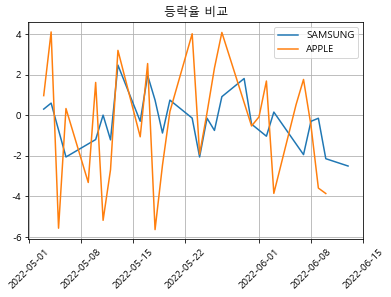

In [12]:
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
time = str(datetime.datetime.now())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pykrx as krx
time_now = str(datetime.datetime.now())
df_ss = pdr.get_data_yahoo('005930.KS','20220501',time_now)
df_apl = pdr.get_data_yahoo('AAPL','20220501',time_now)
df_ss.drop('Adj Close',axis=1,inplace=True)
df_apl.drop('Adj Close',axis=1,inplace=True)

# 주가비교
# plt.plot(df_ss.index,'Close',data=df_ss,label='SAMSUNG')
# plt.plot(df_apl.index,'Close',data=df_apl,label='APPLE')
# plt.xticks(rotation=45)
# plt.grid()
# plt.legend()
# plt.title('SAMSUNG VS APPLE')
# plt.show()

# 일간변동률 지수화
for df in [df_ss,df_apl]:
    df['전일종가'] = df['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
    df['전일대비변동가격'] = df['Close'] - df['전일종가']
    df['전일기준등락율'] = ((df['Close'] - df['전일종가'])/df['전일종가']) * 100
    
# 차트출력
plt.plot(df_ss.index,'전일기준등락율',data=df_ss,label='SAMSUNG')
plt.plot(df_apl.index,'전일기준등락율',data=df_apl,label='APPLE')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.title('등락율 비교')
plt.show()

In [47]:
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
time = str(datetime.datetime.now())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pykrx as krx

time_now = str(datetime.datetime.now())
df_ss = pdr.get_data_yahoo('005930.KS','20200101',time_now)
df_apl = pdr.get_data_yahoo('AAPL','20200101',time_now)
df_ss.drop('Adj Close',axis=1,inplace=True)
df_apl.drop('Adj Close',axis=1,inplace=True)
df_ss

,High,Low,Open,Close,Volume
Date,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0
...,...,...,...,...,...
2022-06-07,66400.0,65400.0,66200.0,65500.0,19355755.0
2022-06-08,65700.0,65300.0,65400.0,65300.0,12483180.0
2022-06-09,65200.0,64500.0,65100.0,65200.0,25790725.0


In [73]:
import datetime
now = datetime.datetime.now()
before_7_day = time_now - datetime.timedelta(days=7)
before_7_day


datetime.datetime(2022, 6, 6, 11, 33, 11, 644805)

select:test3_pfname


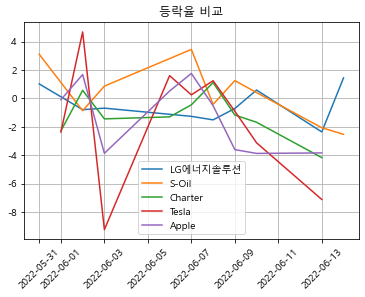

'{"High":{"1653955200000":150.6600036621,"1654041600000":151.7400054932,"1654128000000":151.2700042725,"1654214400000":147.9700012207,"1654473600000":148.5700073242,"1654560000000":149.0,"1654646400000":149.8699951172,"1654732800000":147.9499969482,"1654819200000":140.7599945068,"1655078400000":135.1999969482},"Low":{"1653955200000":146.8399963379,"1654041600000":147.6799926758,"1654128000000":146.8600006104,"1654214400000":144.4600067139,"1654473600000":144.8999938965,"1654560000000":144.1000061035,"1654646400000":147.4600067139,"1654732800000":142.5299987793,"1654819200000":137.0599975586,"1655078400000":131.4400939941},"Open":{"1653955200000":149.0700073242,"1654041600000":149.8999938965,"1654128000000":147.8300018311,"1654214400000":146.8999938965,"1654473600000":147.0299987793,"1654560000000":144.3500061035,"1654646400000":148.5800018311,"1654732800000":147.0800018311,"1654819200000":140.2799987793,"1655078400000":132.8699951172},"Close":{"1653955200000":148.8399963379,"1654041600

In [3]:
import re
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
time = str(datetime.datetime.now())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DB.portfolioDB import Portfolio
from pandas_datareader import data as pdr
import pykrx as krx
port = Portfolio()
# 사용자가 클릭한 포트폴리오 이름 가져오기
#pfname = request.args.get('pfname')

# 포트폴리오 이름에 해당되는 데이터 DB에서 꺼내오기
res = port.select_port('test3_pfname')

# 한국주식 해외주식 변수 초기화
F_stock={'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'company':[],'code':[],'price':[],'stocks':[]}

# 한국, 해외주식 데이터 변수에 저장
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
        
now = datetime.datetime.now()
str_now = str(now)
before_7_day = now - datetime.timedelta(days=7)
str_before_7_day = str(before_7_day)
before_15_day = now - datetime.timedelta(days=15)
str_before_15_day = str(before_15_day)
df = pd.DataFrame()

for tickers in [K_stock['code'],F_stock['code']]:
    idx = 0
    if re.search('[0-9]+',str(tickers)) != None:
        # 한국주식
        for ticker in tickers:
            # print(ticker)
            # print('idx=',idx)
            # print(K_stock['company'][idx])
            df_data = pdr.get_data_yahoo(str(ticker)+'.KS',str_before_15_day,str_now)
            df_data.drop('Adj Close',axis=1,inplace=True)
            # print(df_data)
            df_data['전일종가'] = df_data['Close'].shift()
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            result = df_data.to_json()
            plt.plot(df_data.index,'전일기준등락율',data=df_data,label=K_stock['company'][idx])
            idx +=1
    else: 
        # 해외주식
        idx = 0
        for ticker in tickers:
            # print(ticker)
            # print('idx=',idx)
            # print(F_stock['company'][idx])
            df_data = pdr.get_data_yahoo(ticker,str_before_15_day,str_now)
            df_data.drop('Adj Close',axis=1,inplace=True)
            #print(df_data)
            df_data['전일종가'] = df_data['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            result = df_data.to_json()
            plt.plot(df_data.index,'전일기준등락율',data=df_data,label=str(F_stock['company'][idx]).split()[0])
            idx +=1
    
        
# 차트출력
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.title('등락율 비교')
plt.show()
result

In [67]:
import re
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
time = str(datetime.datetime.now())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pykrx as krx
port = Portfolio()
# 사용자가 클릭한 포트폴리오 이름 가져오기
#pfname = request.args.get('pfname')

# 포트폴리오 이름에 해당되는 데이터 DB에서 꺼내오기
res = port.select_port('test3_pfname')

# 한국주식 해외주식 변수 초기화
F_stock={'date':[],'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'date':[],'company':[],'code':[],'price':[],'stocks':[]}

# 한국, 해외주식 데이터 변수에 저장
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['date'].append(rl[0])
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['date'].append(rl[0])
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
        
result = pd.DataFrame(K_stock)
result.reset_index(drop=True)
a = []
b = []
c = []
d = []
e = []
f = []
company = result['company'][0]
for i in range(0, len(result)):
    #date = result['date'][i].strftime('%y%m%d')
    #datelst = [int("20" + date[:2]), int(date[2:4]), int(date[4:6])]
    a.append(result['date'][i])
    b.append(result['low'][i])
    c.append(result['open'][i])
    d.append(result['close'][i])
    e.append(result['high'][i])
    f.append(result['volume'][i])

result

select:test3_pfname


KeyError: 'low'

select:test2_pfname


ValueError: too many values to unpack (expected 2)

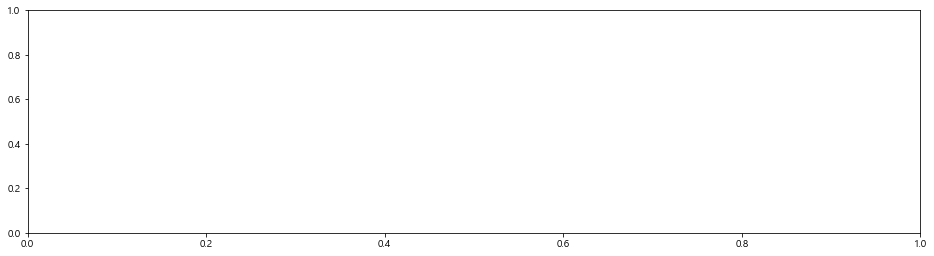

In [27]:
import re
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
time = str(datetime.datetime.now())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pykrx as krx
from DB.portfolioDB import Portfolio
port = Portfolio()
# 사용자가 클릭한 포트폴리오 이름 가져오기
#pfname = request.args.get('pfname')

# 포트폴리오 이름에 해당되는 데이터 DB에서 꺼내오기
res = port.select_port('test2_pfname')

# 한국주식 해외주식 변수 초기화
F_stock={'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'company':[],'code':[],'price':[],'stocks':[]}

# 한국, 해외주식 데이터 변수에 저장
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
now = datetime.datetime.now()
before_1_day = now - datetime.timedelta(days=1)
before_3_day = now - datetime.timedelta(days=3)
str_now = str(now)
str_before_1_day = str(before_1_day)
str_before_3_day = str(before_3_day)
before_7_day = now - datetime.timedelta(days=7)
str_before_7_day = str(before_7_day)

for stock_dict in [K_stock,F_stock]:
    if re.search('[0-9]+',str(stock_dict['code'])) != None:
        # 한국주식
        print(stock_dict['code'])
        for stock_list in stock_dict['code']:
            df_data = pdr.get_data_yahoo(str(stock_list)+'.KS',str_before_3_day,str_now)
            print(df_data)
            df_data.drop('Adj Close',axis=1,inplace=True)
            df_data['전일종가'] = df_data['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            print('ticker',stock_list)
            print(round(df_data['전일기준등락율'][-1],2))
            
    else: 
        # 해외주식
        print(str(stock_dict['code']).upper())
        for stock_list in stock_dict['code']:
            df_data = pdr.get_data_yahoo(stock_list,str_before_7_day,str_now)
            df_data.drop('Adj Close',axis=1,inplace=True)
            df_data['전일종가'] = df_data['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            print('ticker',stock_list)
            print(round(df_data['전일기준등락율'][-1],2))

In [11]:
dalwon = yf.download(['USDKRW=X'],start=before_3_day,end=now)
round(dalwon['Adj Close'][-1],1)

[*********************100%***********************]  1 of 1 completed


1290.3

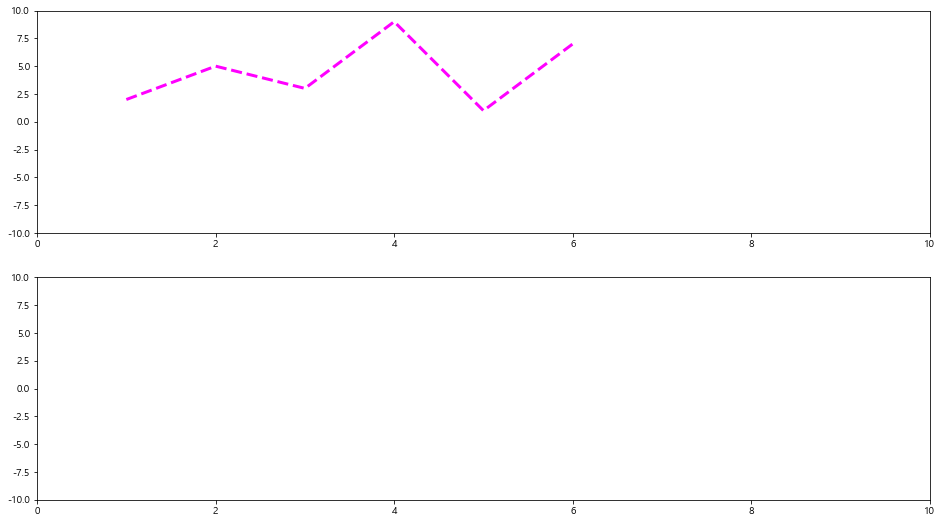

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set(xlim=[0, 10], ylim=[-10,10])
ax2.set(xlim=[0, 10], ylim=[-10,10])
ax1.plot([1,2,3,4,5,6], [2,5,3,9,1,7], color='magenta', linewidth=3, linestyle='--')

In [11]:
import re
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pykrx as krx
from DB.portfolioDB import Portfolio
port = Portfolio()
# 사용자가 클릭한 포트폴리오 이름 가져오기
#pfname = request.args.get('pfname')

# 포트폴리오 이름에 해당되는 데이터 DB에서 꺼내오기
res = port.select_port('test3_pfname')

# 한국주식 해외주식 변수 초기화
F_stock={'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'company':[],'code':[],'price':[],'stocks':[]}

# 한국, 해외주식 데이터 변수에 저장
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
now = datetime.datetime.now()
before_1_day = now - datetime.timedelta(days=1)
before_3_day = now - datetime.timedelta(days=3)
str_now = str(now)
str_before_1_day = str(before_1_day)
str_before_3_day = str(before_3_day)
before_7_day = now - datetime.timedelta(days=7)
str_before_7_day = str(before_7_day)

for stock_dict in [K_stock,F_stock]:
    if re.search('[0-9]+',str(stock_dict['code'])) != None:
        # 한국주식
        print(stock_dict['code'])
        for i in range(len(stock_dict['code'])):
            df_data = pdr.get_data_yahoo(str(stock_dict['code'][i])+'.KS',str_before_7_day,str_now)
            print(df_data)
            df_data.drop('Adj Close',axis=1,inplace=True)
            df_data['전일종가'] = df_data['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            df_data['MDD'] = round((df_data['Low']-df_data['High'])/df_data['High']-1,2)*100
    else: 
        # 해외주식
        print(str(stock_dict['code']).upper())
        for i in range(len(stock_dict['code'])):
            df_data = pdr.get_data_yahoo(stock_dict['code'][i],str_before_7_day,str_now)
            df_data.drop('Adj Close',axis=1,inplace=True)
            df_data['전일종가'] = df_data['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data['전일대비변동가격'] = df_data['Close'] - df_data['전일종가']
            df_data['전일기준등락율'] = ((df_data['Close'] - df_data['전일종가'])/df_data['전일종가']) * 100
            df_data['MDD'] = round((df_data['Low']-df_data['High'])/df_data['High']-1,2)*100
            
        

select:test3_pfname
['373220', '010950']
              High     Low    Open   Close  Volume  Adj Close
Date                                                         
2022-06-08  434500  422500  432500  425500  215828     425500
2022-06-09  426000  419000  426000  422500  208712     422500
2022-06-10  426000  412500  418000  425000  285077     425000
2022-06-13  420500  413500  414000  415000  267003     415000
2022-06-14  432500  410500  411000  426500  417106     426500
2022-06-15  427500  417500  426000  421000  211140     421000
              High     Low    Open   Close  Volume  Adj Close
Date                                                         
2022-06-08  121500  119000  121500  119500  281447     119500
2022-06-09  122000  120000  121000  121000  472660     121000
2022-06-10  121500  118000  120000  121500  291223     121500
2022-06-13  123000  118500  120000  119000  494133     119000
2022-06-14  119000  113500  118000  118500  353772     118500
2022-06-15  119000  114000  1

select:test3_pfname
['373220', '010950']
Date
2022-05-16    0.000000
2022-05-17    0.000000
2022-05-18    0.000000
2022-05-19    0.000000
2022-05-20    0.000000
2022-05-23    0.000000
2022-05-24    0.000000
2022-05-25   -2.736602
2022-05-26   -2.736602
2022-05-27   -2.736602
2022-05-30   -2.736602
2022-05-31   -2.736602
2022-06-02   -2.736602
2022-06-03   -2.736602
2022-06-07   -2.736602
2022-06-08   -4.166667
2022-06-09   -4.842342
2022-06-10   -4.842342
2022-06-13   -6.531532
2022-06-14   -6.531532
2022-06-15   -6.531532
Name: MDD, dtype: float64
LG에너지솔루션
chart_idx :  1
Date
2022-05-16    0.000000
2022-05-17    0.000000
2022-05-18   -2.654867
2022-05-19   -5.309735
2022-05-20   -6.194690
2022-05-23   -7.079646
2022-05-24   -8.849558
2022-05-25   -8.849558
2022-05-26   -8.849558
2022-05-27   -8.849558
2022-05-30   -8.849558
2022-05-31   -8.849558
2022-06-02   -8.849558
2022-06-03   -8.849558
2022-06-07   -8.849558
2022-06-08   -8.849558
2022-06-09   -8.849558
2022-06-10   -8.849558
20

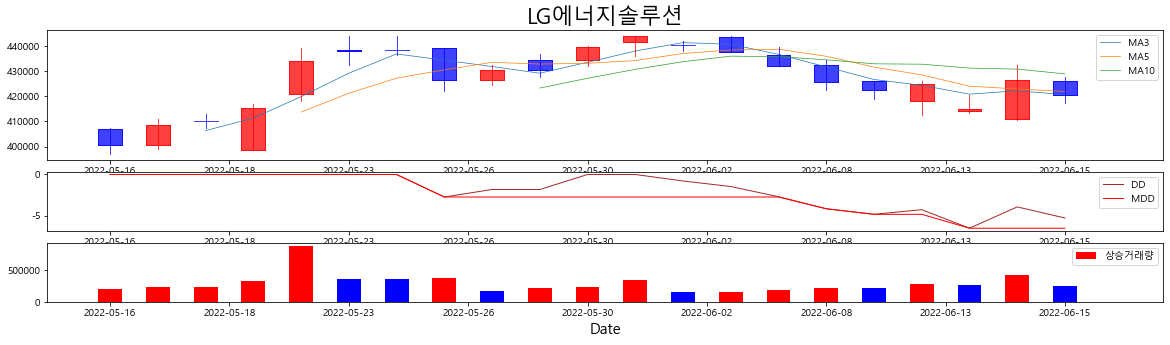

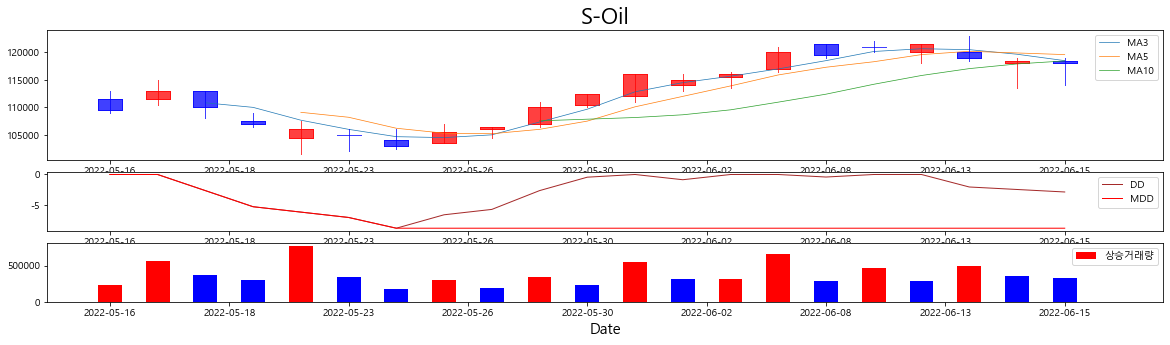

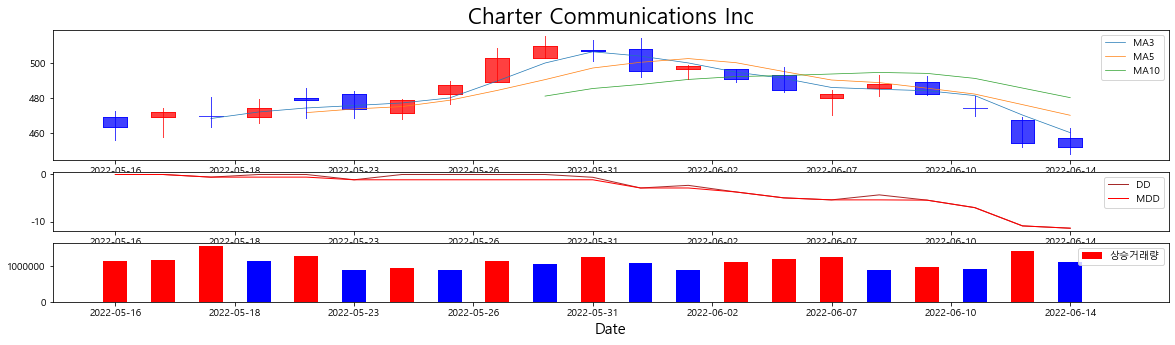

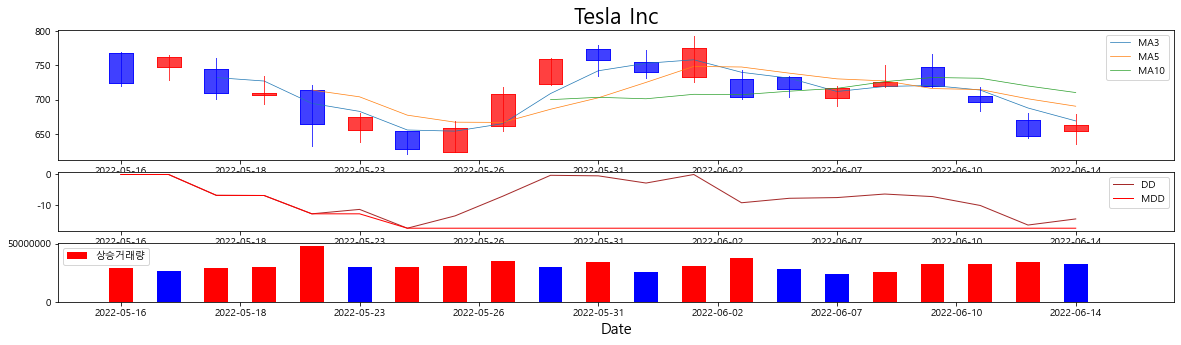

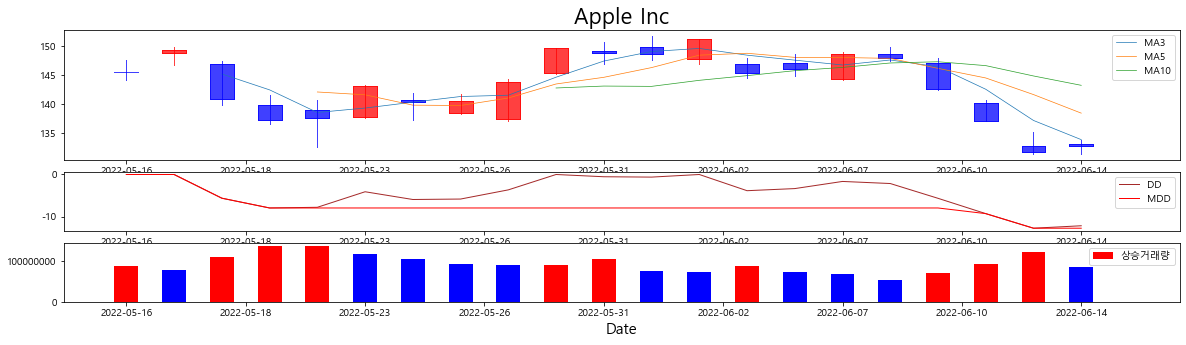

In [24]:
import re
from pykrx import stock
import yfinance as yf
import datetime

# yf.download('TSLA',start='2022-01-01',end='2022-02-01')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_finance import candlestick2_ohlc
import io,time
from pandas_datareader import data as pdr
import pykrx as krx
from DB.portfolioDB import Portfolio
port = Portfolio()
# 사용자가 클릭한 포트폴리오 이름 가져오기
#pfname = request.args.get('pfname')

# 포트폴리오 이름에 해당되는 데이터 DB에서 꺼내오기
res = port.select_port('test3_pfname')

# 한국주식 해외주식 변수 초기화
F_stock={'company':[],'code':[],'price':[],'stocks':[]}
K_stock={'company':[],'code':[],'price':[],'stocks':[]}

def get_chart(df_data,company):
    #-------------------------------------------------------------------------------------------#
    # 그래프구역
    fig = plt.figure(figsize=(20,5))
    top_axes = plt.subplot2grid((4,4), (0,0), rowspan=2, colspan=4,)
    mid_axes = plt.subplot2grid((4,4), (2,0), rowspan=1, colspan=4, sharex=top_axes)
    bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4, sharex=top_axes)
    mid_axes.get_yaxis().get_major_formatter().set_scientific(False) # 거래량 값 그대로 표현
    bottom_axes.get_yaxis().get_major_formatter().set_scientific(False) # 거래량 값 그대로 표현
    #-------------------------------------------------------------------------------------------#

    # 인덱스 설정
    idx = df_data.index.astype('str')

    # 이동평균선 그리기
    top_axes.plot(idx, df_data['MA3'], label='MA3', linewidth=0.7)
    top_axes.plot(idx, df_data['MA5'], label='MA5', linewidth=0.7)
    top_axes.plot(idx, df_data['MA10'], label='MA10', linewidth=0.7)
    mid_axes.plot(idx, df_data['DD'], label='DD', color='brown', linewidth=1)
    mid_axes.plot(idx, df_data['MDD'], label='MDD', color='red', linewidth=1)
    #mid_axes.plot(idx, df_data['전일기준등락율'], label='전일대비등락율', color='green', linewidth=1)
    
    # 캔들차트 그리기
    candlestick2_ohlc(top_axes, df_data['Open'], df_data['High'], df_data['Low'], df_data['Close'], width=0.5, colorup='r', colordown='b')

    #------------------------------------------------------------------------------#
    # 색깔 구분을 위한 함수
    color_fuc = lambda x : 'r' if x >= 0 else 'b'
    # kospi 거래량의 차이 
    df_data['Volume'].diff().fillna(0) ## 첫 행은 값이 Nan이므로 0으로 채워줌
    # 색깔 구분을 위한 함수를 apply 시켜 Red와 Blue를 구분한다.
    color_df = df_data['Volume'].diff().fillna(0).apply(color_fuc)

    # 구분된 값을 list 형태로 만들어준다.
    color_list = list(color_df)

    # 거래량 그래프
    bottom_axes.bar(idx, df_data['Volume'], width=0.5, 
                    align='center',
                    color=color_list)

    # 그래프 title 지정
    top_axes.set_title(company, fontsize=22)
    # X축 티커 숫자 20개로 제한
    top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
    top_axes.legend(['MA3','MA5','MA10'])
    mid_axes.legend(['DD','MDD'])
    bottom_axes.legend(['상승거래량','하락거래량'])
    # X축 라벨 지정
    bottom_axes.set_xlabel('Date', fontsize=15)
    mid_axes.set_xlabel('Date', fontsize=15)
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    return img

# 한국, 해외주식 데이터 변수에 저장
for rl in res:
    if re.search('[0-9]+',rl[3]) != None:
        K_stock['company'].append(rl[2])
        K_stock['code'].append(rl[3])
        K_stock['price'].append(rl[6])
        K_stock['stocks'].append(rl[5])
    else:
        F_stock['company'].append(rl[2])
        F_stock['code'].append(rl[3])
        F_stock['price'].append(rl[6])
        F_stock['stocks'].append(rl[5])
now = datetime.datetime.now()
before_1_day = now - datetime.timedelta(days=1)
before_3_day = now - datetime.timedelta(days=3)
str_now = str(now)
str_before_1_day = str(before_1_day)
str_before_3_day = str(before_3_day)
before_7_day = now - datetime.timedelta(days=7)
str_before_7_day = str(before_7_day)
before_30_day = now - datetime.timedelta(days=30)
str_before_30_day = str(before_30_day)
chart_img = []
chart_idx = 1
for stock_dict in [K_stock,F_stock]:
    if re.search('[0-9]+',str(stock_dict['code'])) != None:
        # 한국주식
        print(stock_dict['code'])
        for i in range(len(stock_dict['code'])):
            df_data_K = pdr.get_data_yahoo(str(stock_dict['code'][i])+'.KS',str_before_30_day,str_now)
            df_data_K.drop('Adj Close',axis=1,inplace=True)
            df_data_K['전일종가'] = df_data_K['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data_K['전일대비변동가격'] = df_data_K['Close'] - df_data_K['전일종가']
            df_data_K['전일기준등락율'] = ((df_data_K['Close'] - df_data_K['전일종가'])/df_data_K['전일종가']) * 100
            df_data_K['MA3'] = df_data_K['Close'].rolling(3).mean()
            df_data_K['MA5'] = df_data_K['Close'].rolling(5).mean()
            df_data_K['MA10'] = df_data_K['Close'].rolling(10).mean()
            df_data_K['MA60'] = df_data_K['Close'].rolling(60).mean()
            window = 20
            max_in_window = df_data_K['Close'].rolling(window,min_periods=1).max()
            df_data_K['DD']=((df_data_K['Close']/max_in_window)-1)*100
            df_data_K['MDD'] = df_data_K['DD'].rolling(window,min_periods=1).min()
            print(df_data_K['MDD'])
            print(K_stock['company'][i])
            get_chart(df_data=df_data_K,company=K_stock['company'][i])
            print('chart_idx : ',chart_idx)
            plt.savefig(f'static/img/chart_{chart_idx}.png')
            time.sleep(1)
            chart_idx += 1
            
    else: 
        # 해외주식
        print(str(stock_dict['code']).upper())
        for i in range(len(stock_dict['code'])):
            df_data_F = pdr.get_data_yahoo(stock_dict['code'][i],str_before_30_day,str_now)
            df_data_F.drop('Adj Close',axis=1,inplace=True)
            df_data_F['전일종가'] = df_data_F['Close'].shift()    # default 1 : 하루(1일) 차분, 아래로 내리기
            df_data_F['전일대비변동가격'] = df_data_F['Close'] - df_data_F['전일종가']
            df_data_F['전일기준등락율'] = ((df_data_F['Close'] - df_data_F['전일종가'])/df_data_F['전일종가']) * 100
            df_data_F['MA3'] = df_data_F['Close'].rolling(3).mean()
            df_data_F['MA5'] = df_data_F['Close'].rolling(5).mean()
            df_data_F['MA10'] = df_data_F['Close'].rolling(10).mean()
            df_data_F['MA60'] = df_data_F['Close'].rolling(60).mean()
            window = 20
            max_in_window = df_data_F['Close'].rolling(window,min_periods=1).max()
            df_data_F['DD']=((df_data_F['Close']/max_in_window)-1)*100
            df_data_F['MDD'] = df_data_F['DD'].rolling(window,min_periods=1).min()
            print(df_data_F['MDD'])
            print(F_stock['company'][i])
            get_chart(df_data=df_data_F,company=F_stock['company'][i])
            print('chart_idx : ',chart_idx)
            plt.savefig(f'static/img/chart_{chart_idx}.png')
            time.sleep(1)
            chart_idx += 1
print(chart_img)

total_cnt = len(K_stock['company'])+len(F_stock['company'])



In [4]:
from DB.quantvis import Quantvis

quant = Quantvis()
list = quant.select_price('tmo')
list[0]

555.15

In [2]:
import time
from pykrx import stock
import pandas as pd
import pymysql
from datetime import date

# 혹 코스피200이나 코스닥 150 변동이 있을 수 있고, 업데이트가 이상하게 될 수 있으므로 이렇게 무식한 방법으로,,,
KOSDAQ150 = ['265520', '035760', '058820', '195940', '028300', '067630', '035900', '035600', '060720',
'108320', '060250', '030190', '218410', '151910', '036540', '098460', '078130', '035080',
'007390', '033640', '119860', '032190', '068240', '045390', '078600', '213420', '194480',
'086450', '005290', '025900', '131970', '141080', '058470', '267980', '215200', '235980',
'086900', '140410', '080160', '053030', '064550', '323990', '090460', '100090', '000250',
'038500', '038540', '089980', '006730', '092190', '046890', '178320', '015750', '299660',
'268600', '068760', '091990', '357780', '036830', '253450', '222800', '222080', '096530',
'025980', '092040', '084850', '027360', '067160', '053800', '131370', '196170', '293780',
'101490', '056190', '041510', '237690', '298380', '088800', '230360', '086520', '247540',
'383310', '036810', '183490', '061970', '290650', '066970', '033310', '039200', '138080',
'122870', '041190', '240810', '074600', '104830', '030530', '069080', '112040', '018000',
'206650', '023410', '084370', '272290', '078020', '102710', '039030', '060150', '048530',
'095700', '204270', '082270', '036930', '144510', '085660', '278280', '293490', '042000',
'078340', '214370', '032500', '052400', '290510', '183300', '041960', '029960', '033290',
'200130', '294570', '214150', '095610', '108230', '064760', '131290', '104480', '034230',
'214450', '140860', '091700', '263750', '022100', '319660', '137400', '166090', '003380',
'256840', '084990', '048410', '243070', '084110', '145020']

KOSPI200 = ['282330', '138930', '001040', '079160', '000120', '097950', '005830', '000990', '000210', '375500',
'114090', '078930', '006360', '007070', '294870', '267250', '011200', '105560', '002380', '016380',
'030200', '033780', '003550', '034220', '051900', '373220', '032640', '011070', '066570', '051910',
'079550', '006260', '010120', '001120', '035420', '005940', '010060', '178920', '005490', '010950',
'034730', '011790', '001740', '006120', '302440', '326030', '402340', '361610', '096770', '285130',
'017670', '000660', '064960', '069260', '035250', '010130', '011780', '073240', '000270', '024110',
'002350', '251270', '006280', '005250', '004370', '001680', '047040', '042660', '003090', '069620',
'006650', '001440', '003490', '192080', '001230', '026960', '006040', '014820', '000150', '241560',
'034020', '336260', '032350', '023530', '004000', '004990', '005300', '011170', '204320', '138040',
'008560', '009900', '006800', '003850', '003000', '006400', '028260', '207940', '032830', '018260',
'028050', '009150', '005930', '010140', '016360', '029780', '000810', '000070', '004490', '068270',
'004170', '031430', '019170', '055550', '003410', '112610', '002790', '090430', '020560', '010780',
'005850', '012750', '036570', '111770', '003520', '000670', '007310', '271560', '001800', '316140',
'000100', '139480', '020150', '030000', '185750', '013890', '035720', '323410', '377300', '192820',
'120110', '021240', '192400', '284740', '259960', '039490', '003240', '028670', '047050', '003670',
'103140', '086790', '352820', '000080', '036460', '071050', '000240', '015760', '009540', '161890',
'161390', '047810', '008930', '128940', '009240', '020000', '105630', '014680', '018880', '009420',
'051600', '052690', '180640', '000880', '088350', '009830', '272210', '012450', '000720', '005440',
'086280', '042670', '064350', '012330', '010620', '069960', '017800', '011210', '004020', '329180',
'005380', '001450', '057050', '008770', '241590', '004800', '298050', '298020', '093370', '081660']

def updateData(stock_code):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        name = "k"+ stock_code
        sql = f"select * from {name}"
        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'open', 'high', 'low', 'close', 'volume', 'company', 'ticker']
        result = pd.DataFrame(rows, columns=col)
        
        today = date.today()
        x_date = result['date'][len(result)-1]

        # 업데이트 필요시
        if x_date < today:
            df = stock.get_market_ohlcv_by_date(fromdate=str(x_date), todate=str(today), ticker=stock_code)
            df = df.assign(종목코드=stock_code, 종목명=stock.get_market_ticker_name(stock_code))
            df = df[1:df.size] # 기준 날은 슬라이싱
            df = df.reset_index()
            # return df
                      
            for i in range(0, len(df)):
                date2 = df['날짜'][i].strftime('%y%m%d')
                open = df['시가'][i]
                high = df['고가'][i]
                low = df['저가'][i]
                close = df['종가'][i]
                volume = df['거래량'][i]
                company = df['종목명'][i]
                ticker = df['종목코드'][i]
                
                sql = f"insert into {name} values({date2}, {open}, {high}, {low}, {close}, {volume}, '{company}', '{ticker}')"
                cursor.execute(sql)
                conn.commit()
        else:
            print("해당 테이블은 업데이트 할 내용이 없습니다.")
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()

# 매개변수는 ticker만
# 여기에 KOSPI200 or KOSDAQ150
for i in KOSDAQ150:
    updateData(i)
for i in KOSPI200:
		updateData(i)

In [15]:
from pykrx import stock
import pandas as pd
import pymysql


def getTable():
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }
    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        sql = "show tables"
        cursor.execute(sql)
        rows = cursor.fetchall()
        sql = f"create table if not exists companyList (Company varchar(75) primary key, Ticker varchar(50))"
        cursor.execute(sql)
        conn.commit()
        print('데이터 입력')
        i = 1;
        for row in rows:
            name = row[0]
            sql = f"select company, ticker from `{name}` limit 1"
            cursor.execute(sql)
            rows2 = cursor.fetchall()
            col = ['company', 'ticker']
            result2 = pd.DataFrame(rows2, columns=col)
            result2.reset_index(drop=True)
            company = result2['company'][0]
            ticker = result2['ticker'][0]
            if ticker == 'FOXA':
                company = 'Fox Corporation(FOXA)'
            elif ticker == 'GOOGL':
                company = 'Alphabet Inc(GOOGL)'
            elif ticker == 'NWSA':
                company = 'News Corporation(NWSA)'
            elif ticker == 'UAA':
                company = 'Under Armour Inc(UAA)'
   
            sql = f"insert into companyList values('{company}', '{ticker}')"
            cursor.execute(sql)
            conn.commit()
            print(i)
            i+=1
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()
getTable()

데이터 입력
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [1]:
from pandas_datareader import data as pdr 
import yfinance as yf 
import pandas as pd
import pymysql
import re
import datapackage
import pandas as pd
import math
from datetime import date
yf.pdr_override()

ustotalcodelist = ['a', 'aal', 'aap', 'aapl', 'abbv', 'abc', 'abmd', 'abt', 'acn', 'adbe', 'adi', 'adm', 'adp', 'adsk', 'aee', 'aep', 'aes', 'afl', 'aig', 'aiz', 'ajg', 'akam', 'alb', 'algn', 'alk', 'all', 'alle', 'amat', 'amcr', 'amd', 'ame', 'amgn', 'amp', 'amt', 'amzn', 'anet', 'anss', 'antm', 'aon', 'aos', 'apa', 'apd', 'aph', 'aptv', 'are', 'ato', 'atvi', 'avb', 'avgo', 'avy', 'awk', 'axp', 'azo', 'ba', 'bac', 'bax', 'bbwi', 'bby', 'bdx', 'ben', 'bf-b', 'biib', 'bio', 'bk', 'bkng', 'bkr', 'blk', 'bll', 'bmy', 'br', 'brk-b', 'bro', 'bsx', 'bwa', 'bxp', 'c', 'cag', 'cah', 'carr', 'cat', 'cb', 'cboe', 'cbre', 'cci', 'ccl', 'cday', 'cdns', 'cdw', 'ce', 'cern', 'cf', 'cfg', 'chd', 'chrw', 'chtr', 'ci', 'cinf', 'cl', 'clx', 'cma', 'cmcsa', 'cme', 'cmg', 'cmi', 'cms', 'cnc', 'cnp', 'cof', 'coo', 'cop', 'cost', 'cpb', 'cprt', 'crl', 'crm', 'csco', 'csx', 'ctas', 'ctlt', 'ctra', 'ctsh', 'ctva', 'ctxs', 'cvs', 'cvx', 'czr', 'd', 'dal', 'dd', 'de', 'dfs', 'dg', 'dgx', 'dhi', 'dhr', 'dis', 'dish', 'dlr', 'dltr', 'dov', 'dow', 'dpz', 'dre', 'dri', 'dte', 'duk', 'dva', 'dvn', 'dxc', 'dxcm', 'ea', 'ebay', 'ecl', 'ed', 'efx', 'eix', 'el', 'emn', 'emr', 'enph', 'eog', 'eqix', 'eqr', 'es', 'ess', 'etn', 'etr', 'etsy', 'evrg', 'ew', 'exc', 'expd', 'expe', 'exr', 'f', 'fang', 'fast', 'fb', 'fbhs', 'fcx', 'fdx', 'fe', 'ffiv', 'fis', 'fisv', 'fitb', 'flt', 'fmc', 'fox', 'foxa', 'frc', 'frt', 'ftnt', 'ftv', 'gd', 'ge', 'gild', 'gis', 'gl', 'glw', 'gm', 'gnrc', 'goog', 'googl', 'gpc', 'gpn', 'gps', 'grmn', 'gs', 'gww', 'hal', 'has', 'hban', 'hbi', 'hca', 'hd', 'hes', 'hig', 'hii', 'hlt', 'holx', 'hon', 'hpe', 'hpq', 'hrl', 'hsic', 'hst', 'hsy', 'hum', 'hwm', 'ibm', 'ice', 'idxx', 'iex', 'iff', 'ilmn', 'incy', 'intc', 'intu', 'ip', 'ipg', 'ipgp', 'iqv', 'ir', 'irm', 'isrg', 'it', 'itw', 'ivz', 'j', 'jbht', 'jci', 'jkhy', 'jnj', 'jnpr', 'jpm', 'k', 'key', 'keys', 'khc', 'kim', 'klac', 'kmb', 'kmi', 'kmx', 'ko', 'kr', 'l', 'ldos', 'leg', 'len', 'lh', 'lhx', 'lin', 'lkq', 'lly', 'lmt', 'lnc', 'lnt', 'low', 'lrcx', 'lumn', 'luv', 'lvs', 'lw', 'lyb', 'lyv', 'ma', 'maa', 'mar', 'mas', 'mcd', 'mchp', 'mck', 'mco', 'mdlz', 'mdt', 'met', 'mgm', 'mhk', 'mkc', 'mktx', 'mlm', 'mmc', 'mmm', 'mnst', 'mo', 'mos', 'mpc', 'mpwr', 'mrk', 'mrna', 'mro', 'ms', 'msci', 'msft', 'msi', 'mtb', 'mtch', 'mtd', 'mu', 'nclh', 'ndaq', 'nee', 'nem', 'nflx', 'ni', 'nke', 'nlok', 'nlsn', 'noc', 'now', 'nrg', 'nsc', 'ntap', 'ntrs', 'nue', 'nvda', 'nvr', 'nwl', 'nws', 'nwsa', 'nxpi', 'o', 'odfl', 'ogn', 'oke', 'omc', 'orcl', 'orly', 'otis', 'oxy', 'payc', 'payx', 'pcar', 'peak', 'peg', 'penn', 'pep', 'pfe', 'pfg', 'pg', 'pgr', 'ph', 'phm', 'pkg', 'pki', 'pld', 'pm', 'pnc', 'pnr', 'pnw', 'pool', 'ppg', 'ppl', 'pru', 'psa', 'psx', 'ptc', 'pvh', 'pwr', 'pxd', 'pypl', 'qcom', 'qrvo', 'rcl', 're', 'reg', 'regn', 'rf', 'rhi', 'rjf', 'rl', 'rmd', 'rok', 'rol', 'rop', 'rost', 'rsg', 'rtx', 'sbac', 'sbux', 'schw', 'see', 'shw', 'sivb', 'sjm', 'slb', 'sna', 'snps', 'so', 'spg', 'spgi', 'sre', 'ste', 'stt', 'stx', 'stz', 'swk', 'swks', 'syf', 'syk', 'syy', 't', 'tap', 'tdg', 'tdy', 'tech', 'tel', 'ter', 'tfc', 'tfx', 'tgt', 'tjx', 'tmo', 'tmus', 'tpr', 'trmb', 'trow', 'trv', 'tsco', 'tsla', 'tsn', 'tt', 'ttwo', 'twtr', 'txn', 'txt', 'tyl', 'ua', 'uaa', 'ual', 'udr', 'uhs', 'ulta', 'unh', 'unp', 'ups', 'uri', 'usb', 'v', 'vfc', 'vlo', 'vmc', 'vno', 'vrsk', 'vrsn', 'vrtx', 'vtr', 'vtrs', 'vz', 'wab', 'wat', 'wba', 'wdc', 'wec', 'well', 'wfc', 'whr', 'wm', 'wmb', 'wmt', 'wrb', 'wrk', 'wst', 'wu', 'wy', 'wynn', 'xel', 'xom', 'xray', 'xyl', 'yum', 'zbh', 'zbra', 'zion', 'zts']
#미국주식 497종목, "-"유지

def updateData(stock_code):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        code=stock_code.replace("-","_")
        sql = f"select * from `{code}`"
        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'open', 'high', 'low', 'close', 'volume', 'company', 'ticker']
        result = pd.DataFrame(rows, columns=col)
        
        today = date.today()
        x_date = result['date'][len(result)-1]
        # 업데이트 필요시
        if x_date < today:                  #brk-b, aapl 
            stock_data= pdr.get_data_yahoo(stock_code,start=f"20{x_date.strftime('%y-%m-%d')}",end=f"20{today.strftime('%y-%m-%d')}")
            ticker= yf.Ticker(f"{stock_code}")
            company= ticker.info.get('longName')
            company= re.sub("[!@#$%^&&*()/`~_.,+=']",'',company)
            d= pd.DataFrame( 
            {   'Open':stock_data['Open'],
                'High':stock_data['High'],
                'Low':stock_data['Low'],
                'Close':stock_data['Close'],
                'Volume':stock_data['Volume'],
                'Company': f"{company}", 
                'Ticker': stock_code.upper()
                })
            df= d.where(pd.notnull(d), None)
            df = df[2:df.size] # 기준 날은 슬라이싱
            df = df.reset_index()
            
            for i in range(0, len(df)):
                 date2 = df['Date'][i].strftime('%y%m%d')
                 open= df['Open'][i].astype('float')
                 high = df['High'][i].astype('float')
                 low = df['Low'][i].astype('float')
                 close = df['Close'][i].astype('float')
                 volume = df['Volume'][i].astype('float')
                 company = df['Company'][i]
                 ticker = df['Ticker'][i].replace("-","_")
                
                 sql = f"insert into `{ticker}` values({date2}, {open}, {high}, {low}, {close}, {volume}, '{company}', '{ticker}')"
                 cursor.execute(sql)
                 conn.commit()
        else:
            print("해당 테이블은 업데이트 할 내용이 없습니다.")
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()


count=1 
for usStock in ustotalcodelist:
    updateData(usStock) 
    print(f"{usStock}을 입력합니다.")
    print(f"{count}/497")
    
    count+=1

[*********************100%***********************]  1 of 1 completed


C:\Users\user\AppData\Local\Temp\ipykernel_9268\4269520416.py:43: FutureWarning: Possible set intersection at position 7
  company= re.sub("[!@#$%^&&*()/`~_.,+=']",'',company)


a을 입력합니다.
1/497
[*********************100%***********************]  1 of 1 completed
aal을 입력합니다.
2/497
[*********************100%***********************]  1 of 1 completed
aap을 입력합니다.
3/497
[*********************100%***********************]  1 of 1 completed
aapl을 입력합니다.
4/497
[*********************100%***********************]  1 of 1 completed
abbv을 입력합니다.
5/497
[*********************100%***********************]  1 of 1 completed
abc을 입력합니다.
6/497
[*********************100%***********************]  1 of 1 completed
abmd을 입력합니다.
7/497
[*********************100%***********************]  1 of 1 completed
abt을 입력합니다.
8/497
[*********************100%***********************]  1 of 1 completed
acn을 입력합니다.
9/497
[*********************100%***********************]  1 of 1 completed
adbe을 입력합니다.
10/497
[*********************100%***********************]  1 of 1 completed
adi을 입력합니다.
11/497
[*********************100%***********************]  1 of 1 completed
adm을 입력합니다.
12/497
[*******************

In [ ]:
#MYSQL=> 데이터베이스가 없다면 만들어야함. 
create database quantvis_strategy_1;
grant all privileges on quantvis_strategy_1.* to 'quantvis'@'localhost'
#grant all privileges on 데이터베이스이름.모든테이블 to 계정ID @ 로컬호스트 


In [3]:

from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt
import yfinance as yf 
import pandas as pd
import pymysql
import re
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import datapackage
import math
import numpy as np 
import datetime
from pykrx import stock
yf.pdr_override()

In [ ]:
def getEBITROIC(ticker):  
    TICKER = ticker.upper()
    ticker = yf.Ticker(ticker)
    sector= ticker.info.get('sector')
    TICKER_pretreatment= TICKER.replace("-","_")
    quarterly_financial= ticker.quarterly_financials
    quarterly_balance_sheet= ticker.quarterly_balance_sheet 
    
    quarterly_ebit=quarterly_financial.loc[['Ebit']]
    quarterly_currentasset=quarterly_balance_sheet.loc[['Total Current Assets']]
    quarterly_currentliabilities= quarterly_balance_sheet.loc[['Total Current Liabilities']] 
    
    try: 
        quarterly_intangibleassets= quarterly_balance_sheet.loc[['Intangible Assets']]
    except: 
        totalasset= quarterly_balance_sheet.loc[['Total Assets']]
        totalliabilities= quarterly_balance_sheet.loc[['Total Liab']] 
        nettangibleasset= quarterly_balance_sheet.loc[['Net Tangible Assets']]
        resu= pd.concat([totalasset,totalliabilities,nettangibleasset])
        resul= resu.transpose()
        resul['Intangible Assets']= resul['Total Assets']- resul['Total Liab']-resul['Net Tangible Assets'] 
        del resul['Total Assets'] 
        del resul['Total Liab']
        del resul['Net Tangible Assets'] 
        result= resul.transpose() 
        quarterly_intangibleassets= result

    quarterly_nettangibleassets= quarterly_balance_sheet.loc[['Net Tangible Assets']]
    quarterly_ebit_transpose= quarterly_ebit.transpose() 
    quarterly_currentasset_transpose= quarterly_currentasset.transpose() 
    quarterly_currentliabilities_transpose= quarterly_currentliabilities.transpose() 
    quarterly_intangibleassets_transpose= quarterly_intangibleassets.transpose() 
    quarterly_nettangibleassets_transpose= quarterly_nettangibleassets.transpose() 

    total= pd.concat([quarterly_ebit_transpose,quarterly_currentasset_transpose,quarterly_currentliabilities_transpose, quarterly_intangibleassets_transpose, quarterly_nettangibleassets_transpose], axis= 1)
    total['Net Working Capital']= total['Total Current Assets']-total['Total Current Liabilities']
    total['Net Fixed Assets'] = total['Net Tangible Assets']+total['Intangible Assets']
    total['ROIC_ReturnOnInvestedCapital'] = total['Ebit'] / (total['Net Working Capital']+total['Net Fixed Assets'])  
    total['Ticker']= TICKER_pretreatment
    total['Sector']= sector
    del total ['Total Current Assets']
    del total ['Total Current Liabilities'] 
    del total ['Net Tangible Assets']
    del total ['Intangible Assets']
    
    total= pd.DataFrame( 
           {'date':total.index,
            'ticker':total['Ticker'],
            'sector':total['Sector'],
            'ebit':total['Ebit'],
            'roic':total['ROIC_ReturnOnInvestedCapital'],
            'networkingcapital':total['Net Working Capital'],
            'netfixedassets': total['Net Fixed Assets']
            })
    total= total.fillna(0) 
    return total


def inputUSstockDB(df):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        name = df['ticker'][0]
        sql = f"create table if not exists `{name}_JG_EBITROIC` (`date` date primary key, `ticker` varchar(50),`sector` varchar(50),`ebit` float, `roic` float, `networkingcapital` float, `netfixedassets` float)"
        cursor.execute(sql)
        conn.commit()
        
        for i in range(0, len(df)):
            date = df['date'][i].strftime('%y%m%d')
            ticker= df['ticker'][i]
            sector=df['sector'][i]
            ebit= df['ebit'][i]
            roic= df['roic'][i]
            networkingcapital= df['networkingcapital'][i] 
            netfixedassets= df['netfixedassets'][i]
            sql = f"insert into `{name}_JG_EBITROIC` values({date},'{ticker}','{sector}', {ebit}, {roic},{networkingcapital},{netfixedassets})"
            cursor.execute(sql)
            conn.commit()
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()

ustotalcodelist= ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
count=1 
for code in ustotalcodelist:  
    try: 
        df= getEBITROIC(code)
        inputUSstockDB(df)
        print(code,"입력합니다",count,"/494(미국주식)")
        print(f"{df}를 입력했습니다.맞나요? ")
        count +=1 
    except: 
        print("에러발생: 영게이에게 문의하세요!")
        
def SELECT_JG_rank(ticker):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        
        code = yf.Ticker(ticker)
        mktcap= code.info['marketCap']
        totaldebt= code.info['totalDebt']
        totalcash= code.info['totalCash'] 
        ev=mktcap+totaldebt-totalcash 
        
        sql = f"select date, sector, ticker, roic, ebit FROM {ticker}_jg_ebitroic order by date desc limit 1"

        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'sector', 'ticker' ,'roic','ebit']
        result = pd.DataFrame(rows, columns=col)
        result['today_ev'] = ev
        result['today_mktcap']= mktcap
        result['earnings_yield'] = result['ebit']/result['today_ev'] 
        del result['ebit']
        del result['today_ev'] 
        
        return result    
    
    except Exception as e:
        print("DB연동 에러 : ", e)

def selectrank():     
        dfs= []
        ustotalcodelist= ['A', 'AAL','AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
        count=1    
    
        for code in ustotalcodelist:  
            global combined
            code= code.replace("-","_")
            result= SELECT_JG_rank(code)
            print(code,"불러옵니다.",count,"/494(미국주식)")
            count +=1 
            dfs.append(result)

        combined = pd.concat(dfs)

        is_financial = combined['sector'] != 'Financial Services' 
        combined_1 = combined[is_financial]
        is_utilities= combined_1['sector'] !='Utilities'
        combined_2 = combined_1[is_utilities]
        is_mktcap= combined_2['today_mktcap']>50000000
        combined_3= combined_2[is_mktcap]
        combined_4_ey= combined_3.sort_values(by= ['earnings_yield','roic'],ascending= False).head(30)
        combined_5_roic= combined_3.sort_values(by=['roic','earnings_yield'],ascending= False).head(30)
        
        return combined_4_ey, combined_5_roic

def selectinsert_JG_rank(combined_4_ey,combined_5_roic):   
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }
    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        today= datetime.datetime.today().strftime("%Y%m%d") 
        
        sql = f"create table if not exists `JG_result_ey_{today}` (`date` date , `sector` varchar(100) ,`ticker` varchar(50) primary key, roic float, today_mktcap float, earnings_yield float)"
        sql2= f"create table if not exists `JG_result_roic_{today}` (`date` date , `sector` varchar(100) ,`ticker` varchar(50) primary key, roic float, today_mktcap float, earnings_yield float)"
        
        cursor.execute(sql)
        cursor.execute(sql2)

        for i in range(0, len(combined_4_ey)):
            date = combined_4_ey['date'].iloc[i].strftime('20%y-%m-%d')
            sector=combined_4_ey['sector'].iloc[i]
            ticker= combined_4_ey['ticker'].iloc[i]
            roic= combined_4_ey['roic'].iloc[i].astype('float')
            today_mktcap= combined_4_ey['today_mktcap'].iloc[i].astype('float')
            earnings_yield= combined_4_ey['earnings_yield'].iloc[i].astype('float')
            sql3 = f"insert into `JG_result_ey_{today}` values('{date}','{sector}','{ticker}', {roic}, {today_mktcap},{earnings_yield})"
            cursor.execute(sql3)
            
        for i in range(0, len(combined_5_roic)):
            date = combined_5_roic['date'].iloc[i].strftime('20%y-%m-%d')
            sector=combined_5_roic['sector'].iloc[i]
            ticker= combined_5_roic['ticker'].iloc[i]
            roic= combined_5_roic['roic'].iloc[i].astype('float')
            today_mktcap= combined_5_roic['today_mktcap'].iloc[i].astype('float')
            earnings_yield= combined_5_roic['earnings_yield'].iloc[i].astype('float')
            sql4 = f"insert into `JG_result_roic_{today}`  values('{date}','{sector}','{ticker}', {roic}, {today_mktcap},{earnings_yield})"
            cursor.execute(sql4)
        
        conn.commit()
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()
        
combined_4_ey,combined_5_roic= selectrank()  
selectinsert_JG_rank(combined_4_ey, combined_5_roic)
print("====첫번째꺼 완료====")

from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt
import yfinance as yf 
import pandas as pd
import pymysql
import re
from selenium import webdriver
import time
import datetime
from bs4 import BeautifulSoup
import datapackage
import math
import numpy as np 
from pykrx import stock
from dateutil.relativedelta import relativedelta
yf.pdr_override()
def getquarterlyEPSROE(ticker):  
    TICKER = ticker.upper()
    TICKER_pretreatment= TICKER.replace("-","_")
    ticker = yf.Ticker(ticker)
    sector= ticker.info.get('sector')
    shares= ticker.info.get('sharesOutstanding')
    
    quarterly_financial= ticker.quarterly_financials
    annaul_balance_sheet= ticker.balance_sheet
    annual_financial= ticker.financials
    
    quarterly_netincome = quarterly_financial.loc[['Net Income Applicable To Common Shares']]
    quarterly_netincome = quarterly_netincome.transpose()
    total=pd.DataFrame() 
    total['quarterly_netincome']= quarterly_netincome
    total['Ticker']= TICKER_pretreatment
    total['outstandingshares']= shares
    total['sector']= sector
    total['quarterly_eps']= total['quarterly_netincome']/total['outstandingshares']
    total['annual_netincome']=0 
    total['annaul_eps']=0 
    total['annaul_roe']=0 
    total= pd.DataFrame( 
           {'date':total.index,
            'ticker':total['Ticker'],
            'sector':total['sector'],
            'outstandingshares':total['outstandingshares'],
            'quarterly_netincome':total['quarterly_netincome'],
            'quarterly_eps': total['quarterly_eps'],
            'annual_netincome':total['annual_netincome'], 
            'annual_eps':total['annaul_eps'],
            'annaul_roe':total['annaul_roe']
            })
    total1= total.fillna(0) 
    
    annual_netincome = annual_financial.loc[['Net Income Applicable To Common Shares']]
    annual_netincome = annual_netincome.transpose()
    annual_equity= annaul_balance_sheet.loc['Total Stockholder Equity']
    annual_equity= annual_equity.transpose() 
    roecal= pd.concat([annual_netincome,annual_equity],axis=1)
    roecal['annaul_roe']=(roecal['Net Income Applicable To Common Shares']/roecal['Total Stockholder Equity'])*100
    annaul_roe= roecal['annaul_roe']
    del roecal['Net Income Applicable To Common Shares']
    del roecal['Total Stockholder Equity']
    
    total2=pd.DataFrame()
    total2['annaul_roe']= annaul_roe
    total2['annual_netincome']= annual_netincome
    total2['Ticker']= TICKER_pretreatment
    total2['outstandingshares']= shares
    total2['sector']= sector
    total2['quarterly_netincome']=0 
    total2['quarterly_eps']= 0
    total2['annual_netincome']=annual_netincome
    total2['annaul_eps']= total2['annual_netincome']/total2['outstandingshares']
    
    total2= pd.DataFrame( 
       {'date':total2.index,
        'ticker':total2['Ticker'],
        'sector':total2['sector'],
        'outstandingshares':total2['outstandingshares'],
        'quarterly_netincome':total2['quarterly_netincome'],
        'quarterly_eps': total2['quarterly_eps'],
        'annual_netincome':total2['annual_netincome'], 
        'annual_eps':total2['annaul_eps'], 
        'annaul_roe':total2['annaul_roe']
        })
    total2= total2.fillna(0) 
    total3= pd.concat([total1,total2],axis=0)
    return total3


def inputUSstockDB(df):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        name = df['ticker'][0]
        sql = f"create table if not exists `{name}_william_epsroe` (num int not null, `date` date, `ticker` varchar(50),`sector` varchar(50),`outstandingshares` float, `quarterly_netincome` float, `quarterly_eps` float, `annual_netincome` float, `annual_eps` float, `annaul_roe` float, PRIMARY KEY (num))"
        cursor.execute(sql)
        conn.commit()
        num=1
        for i in range(0, len(df)):
            date = df['date'][i].strftime('%y%m%d')
            ticker= df['ticker'][i]
            sector=df['sector'][i]
            outstandingshares=df['outstandingshares'][i]
            quarterly_netincome= df['quarterly_netincome'][i]
            quarterly_eps = df['quarterly_eps'][i]
            annual_netincome= df['annual_netincome'][i] 
            annual_eps= df['annual_eps'][i]
            annaul_roe= df['annaul_roe'][i]
            sql = f"insert into `{name}_william_epsroe` values({num},{date},'{ticker}','{sector}', {outstandingshares}, {quarterly_netincome},{quarterly_eps},{annual_netincome},{annual_eps},{annaul_roe})"
            cursor.execute(sql)
            conn.commit()
            num+=1
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()

ustotalcodelist= ['A', 'AAP', 'AAL', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
count=1 
for code in ustotalcodelist:  
    try: 
        df= getquarterlyEPSROE(code)
        inputUSstockDB(df)
        print(code,"입력합니다",count,"/494(미국주식)")
        print(f"{df}를 입력했습니다.")
        count +=1 
    except: 
        print("에러발생: 영게이에게 문의하세요!")
        
def SELECT_William_rank(ticker):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        tickerr= ticker.replace("-","_")
        sql = f"select date, ticker, sector, quarterly_eps, annual_netincome, annual_eps, annaul_roe FROM {tickerr}_william_epsroe order by date desc"

        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'ticker', 'sector' ,'quarterly_eps', 'annual_netincome','annual_eps','annaul_roe']
        result = pd.DataFrame(rows, columns=col)

        return result
    except Exception as e:
        print("DB연동 에러 : ", e)

def CAstandard(df):
    quarterlyepsdflist= [] 
      
    for i in range(len(df)): 
        if df['quarterly_eps'][i] != 0: 
            date= df['date'][i]
            ticker= df['ticker'][i]
            sector= df['sector'][i] 
            quarterly_eps=df['quarterly_eps'][i]
            quarterlyepsdflist.append([date,ticker,sector,quarterly_eps])
           
    quarterlyepsdf= pd.DataFrame(quarterlyepsdflist, columns= ['date','ticker','sector','quarterly_eps'] )  
    
    a= ((quarterlyepsdf['quarterly_eps'][0]/ quarterlyepsdf['quarterly_eps'][1])-1) *100 
    a_percent= round(a,2) #지난 분기대비 이번분기실적% 
    
    annuallist= [] 
    for i in range(len(df)): 
        if df['annual_netincome'][i] !=0: 
            date= df['date'][i]
            ticker= df['ticker'][i]
            sector= df['sector'][i] 
            annual_netincome=df['annual_netincome'][i]
            annual_eps= df['annual_eps'][i] 
            annaul_roe= df['annaul_roe'][i]
            annuallist.append([date,ticker,sector,annual_netincome,annual_eps, annaul_roe ])
            
    annualdf = pd.DataFrame(annuallist, columns= ['date','ticker','sector','annual_netincome','annual_eps','annaul_roe'])   

    if annualdf['annual_netincome'][0] and annualdf['annual_netincome'][1] !=None :
        firstyear= ((annualdf['annual_netincome'][0]/annualdf['annual_netincome'][1])-1)*100
        
    if annualdf['annual_netincome'][1] and annualdf['annual_netincome'][2] != None:  
        secondyear= ((annualdf['annual_netincome'][1]/annualdf['annual_netincome'][2])-1)*100
    
    if annualdf['annual_netincome'][2] and annualdf['annual_netincome'][3] != None:
        thirdyear= ((annualdf['annual_netincome'][2]/annualdf['annual_netincome'][3])-1)*100


    oneyearmean = annualdf['annual_netincome'][0]
    twoyeargrowthmean= (firstyear+secondyear)/2 #2-year avg netincome growth
    threeyeargrowthmean= (firstyear+secondyear+thirdyear)/3 # 3-year avg netincome growth
    threeyeargrowthmean= round(threeyeargrowthmean,2)
    threeROEgrowth= (annualdf['annaul_roe'][0] + annualdf['annaul_roe'][1] +annualdf['annaul_roe'][2])/3
    threeROEgrowth = round(threeROEgrowth,2)
    
    ticker= annualdf['ticker'][0].replace("_","-") 
    sector= annualdf['sector'][0]
    quarter= quarterlyepsdf['date'][0]
    standardyear = annualdf['date'][0]
    
    one_year_ago = datetime.datetime.today() - relativedelta(years=1)
    one_year_ago= one_year_ago.strftime("%Y-%m-%d") 
    today= datetime.datetime.today().strftime("%Y-%m-%d") 
    code= pdr.get_data_yahoo(ticker, start=one_year_ago,end=today ) # Stock symbol code / when to begin data  
    code_dpc=(code['Close'] /code['Close'].shift(1)-1)*100 
    code_dpc_cp = ((100+code_dpc)/100).cumprod()*100-100  
    codecumulative= code_dpc_cp.tail(1) 
    codecumulative = round(float(codecumulative),2)

    snp= pdr.get_data_yahoo('^GSPC',start=one_year_ago,end=today)
    snp_dpc=(snp['Close'] /snp['Close'].shift(1)-1)*100 
    snp_dpc_cp = ((100+snp_dpc)/100).cumprod()*100-100  
    snpcumulative= snp_dpc_cp.tail(1) 
    snpcumulative = round(float(snpcumulative),2)
    
    
    total= pd.DataFrame(                  
    [{'티커심볼': ticker,
     '산업분류': sector,
     '기준분기':quarter,
     '기준분기EPS성장률': a_percent, 
     '기준연도': standardyear,
     '3년순이익성장률': threeyeargrowthmean,
     '3년평균ROE': threeROEgrowth, 
     '1년수익률(오늘까지)': codecumulative, 
     '1년지수수익률(오늘까지)': snpcumulative
     }])

    return total

def williamfinal():

    ustotalcodelist= ['A', 'AAP', 'AAL', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS','APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
    #APA 삭제(데이터불량)-> 493 종목 
    #SBUX 삭제(데이터불량) -> 492 종목
    # V 삭제(데이터불량) -> 491 종목 

    dfs = [] 
    count = 1
    for code in ustotalcodelist: 
        print(code,"불러옵니다.",count,"/491(미국주식)")
        df= SELECT_William_rank(code)
        dff= CAstandard(df) # 티커심볼 산업분류 기준분기 기준분기EPS성장률 기준연도년순이익성장률 3년평균ROE한줄씩
        dfs.append(dff)
        count +=1 

    final_df = pd.concat(dfs) #총 491개 

    isquarter25= final_df['기준분기EPS성장률']> 25 
    final_df_1= final_df[isquarter25] #총 127개
    final_df_2_earnings= final_df_1.sort_values(by=['3년순이익성장률','3년평균ROE'],ascending= False).head(30)
    final_df_3_roe= final_df_1.sort_values(by=['3년평균ROE','3년순이익성장률'],ascending= False).head(30)
    final_df_3_vssnp=  final_df_1.sort_values(by=['1년수익률(오늘까지)','3년순이익성장률'],ascending= False).head(30)
    
    
    return final_df_2_earnings, final_df_3_roe, final_df_3_vssnp

def insert_William_rank(final_df_2_earnings, final_df_3_roe, final_df_3_vssnp):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }
    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        today= datetime.datetime.today().strftime("%Y%m%d") 
        
        sql = f"create table if not exists `William_result_earnings_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
        sql2= f"create table if not exists `William_result_roe_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
        sql3= f"create table if not exists `William_result_vssnp_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
      
        cursor.execute(sql)
        cursor.execute(sql2)
        cursor.execute(sql3)
        for i in range(0, len(final_df_2_earnings)):
                ticker= final_df_2_earnings['티커심볼'].iloc[i]
                sector=final_df_2_earnings['산업분류'].iloc[i]
                quarterdate = final_df_2_earnings['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_2_earnings['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_2_earnings['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_2_earnings['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_2_earnings['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_2_earnings['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_2_earnings['1년지수수익률(오늘까지)'].iloc[i] 
                sql4 = f"insert into `William_result_earnings_{today}` values( '{ticker}','{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql4)
                
        for i in range(0, len(final_df_3_roe)):
                ticker= final_df_3_roe['티커심볼'].iloc[i]
                sector=final_df_3_roe['산업분류'].iloc[i]
                quarterdate = final_df_3_roe['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_3_roe['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_3_roe['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_3_roe['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_3_roe['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_3_roe['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_3_roe['1년지수수익률(오늘까지)'].iloc[i] 
                sql5 = f"insert into `William_result_roe_{today}` values( '{ticker}','{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql5)
                
        for i in range(0, len(final_df_3_vssnp)):
                ticker= final_df_3_vssnp['티커심볼'].iloc[i]
                sector=final_df_3_vssnp['산업분류'].iloc[i]
                quarterdate = final_df_3_vssnp['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_3_vssnp['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_3_vssnp['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_3_vssnp['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_3_vssnp['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_3_vssnp['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_3_vssnp['1년지수수익률(오늘까지)'].iloc[i] 
                sql6 = f"insert into `William_result_vssnp_{today}` values( '{ticker}', '{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql6)
            
        conn.commit()
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()
        
final_df_2_earnings,final_df_3_roe, final_df_3_vssnp = williamfinal()
insert_William_rank(final_df_2_earnings,final_df_3_roe, final_df_3_vssnp )


In [7]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt
import yfinance as yf 
import pandas as pd
import pymysql
import re
from selenium import webdriver
import time
import datetime
from bs4 import BeautifulSoup
import datapackage
import math
import numpy as np 
from pykrx import stock
from dateutil.relativedelta import relativedelta
yf.pdr_override()
def getquarterlyEPSROE(ticker):  
    TICKER = ticker.upper()
    TICKER_pretreatment= TICKER.replace("-","_")
    ticker = yf.Ticker(ticker)
    sector= ticker.info.get('sector')
    shares= ticker.info.get('sharesOutstanding')
    
    quarterly_financial= ticker.quarterly_financials
    annaul_balance_sheet= ticker.balance_sheet
    annual_financial= ticker.financials
    
    quarterly_netincome = quarterly_financial.loc[['Net Income Applicable To Common Shares']]
    quarterly_netincome = quarterly_netincome.transpose()
    total=pd.DataFrame() 
    total['quarterly_netincome']= quarterly_netincome
    total['Ticker']= TICKER_pretreatment
    total['outstandingshares']= shares
    total['sector']= sector
    total['quarterly_eps']= total['quarterly_netincome']/total['outstandingshares']
    total['annual_netincome']=0 
    total['annaul_eps']=0 
    total['annaul_roe']=0 
    total= pd.DataFrame( 
           {'date':total.index,
            'ticker':total['Ticker'],
            'sector':total['sector'],
            'outstandingshares':total['outstandingshares'],
            'quarterly_netincome':total['quarterly_netincome'],
            'quarterly_eps': total['quarterly_eps'],
            'annual_netincome':total['annual_netincome'], 
            'annual_eps':total['annaul_eps'],
            'annaul_roe':total['annaul_roe']
            })
    total1= total.fillna(0) 
    
    annual_netincome = annual_financial.loc[['Net Income Applicable To Common Shares']]
    annual_netincome = annual_netincome.transpose()
    annual_equity= annaul_balance_sheet.loc['Total Stockholder Equity']
    annual_equity= annual_equity.transpose() 
    roecal= pd.concat([annual_netincome,annual_equity],axis=1)
    roecal['annaul_roe']=(roecal['Net Income Applicable To Common Shares']/roecal['Total Stockholder Equity'])*100
    annaul_roe= roecal['annaul_roe']
    del roecal['Net Income Applicable To Common Shares']
    del roecal['Total Stockholder Equity']
    
    total2=pd.DataFrame()
    total2['annaul_roe']= annaul_roe
    total2['annual_netincome']= annual_netincome
    total2['Ticker']= TICKER_pretreatment
    total2['outstandingshares']= shares
    total2['sector']= sector
    total2['quarterly_netincome']=0 
    total2['quarterly_eps']= 0
    total2['annual_netincome']=annual_netincome
    total2['annaul_eps']= total2['annual_netincome']/total2['outstandingshares']
    
    total2= pd.DataFrame( 
       {'date':total2.index,
        'ticker':total2['Ticker'],
        'sector':total2['sector'],
        'outstandingshares':total2['outstandingshares'],
        'quarterly_netincome':total2['quarterly_netincome'],
        'quarterly_eps': total2['quarterly_eps'],
        'annual_netincome':total2['annual_netincome'], 
        'annual_eps':total2['annaul_eps'], 
        'annaul_roe':total2['annaul_roe']
        })
    total2= total2.fillna(0) 
    total3= pd.concat([total1,total2],axis=0)
    return total3


def inputUSstockDB(df):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        name = df['ticker'][0]
        sql = f"create table if not exists `{name}_william_epsroe` (num int not null, `date` date, `ticker` varchar(50),`sector` varchar(50),`outstandingshares` float, `quarterly_netincome` float, `quarterly_eps` float, `annual_netincome` float, `annual_eps` float, `annaul_roe` float, PRIMARY KEY (num))"
        cursor.execute(sql)
        conn.commit()
        num=1
        for i in range(0, len(df)):
            date = df['date'][i].strftime('%y%m%d')
            ticker= df['ticker'][i]
            sector=df['sector'][i]
            outstandingshares=df['outstandingshares'][i]
            quarterly_netincome= df['quarterly_netincome'][i]
            quarterly_eps = df['quarterly_eps'][i]
            annual_netincome= df['annual_netincome'][i] 
            annual_eps= df['annual_eps'][i]
            annaul_roe= df['annaul_roe'][i]
            sql = f"insert into `{name}_william_epsroe` values({num},{date},'{ticker}','{sector}', {outstandingshares}, {quarterly_netincome},{quarterly_eps},{annual_netincome},{annual_eps},{annaul_roe})"
            cursor.execute(sql)
            conn.commit()
            num+=1
        
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()

ustotalcodelist= ['A', 'AAP', 'AAL', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
count=1 
for code in ustotalcodelist:  
    try: 
        df= getquarterlyEPSROE(code)
        inputUSstockDB(df)
        print(code,"입력합니다",count,"/494(미국주식)")
        print(f"{df}를 입력했습니다.")
        count +=1 
    except: 
        print("에러발생: 영게이에게 문의하세요!")
        
def SELECT_William_rank(ticker):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }

    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        tickerr= ticker.replace("-","_")
        sql = f"select date, ticker, sector, quarterly_eps, annual_netincome, annual_eps, annaul_roe FROM {tickerr}_william_epsroe order by date desc"

        cursor.execute(sql)
        rows = cursor.fetchall()
        col = ['date', 'ticker', 'sector' ,'quarterly_eps', 'annual_netincome','annual_eps','annaul_roe']
        result = pd.DataFrame(rows, columns=col)

        return result
    except Exception as e:
        print("DB연동 에러 : ", e)

def CAstandard(df):
    quarterlyepsdflist= [] 
      
    for i in range(len(df)): 
        if df['quarterly_eps'][i] != 0: 
            date= df['date'][i]
            ticker= df['ticker'][i]
            sector= df['sector'][i] 
            quarterly_eps=df['quarterly_eps'][i]
            quarterlyepsdflist.append([date,ticker,sector,quarterly_eps])
           
    quarterlyepsdf= pd.DataFrame(quarterlyepsdflist, columns= ['date','ticker','sector','quarterly_eps'] )  
    
    a= ((quarterlyepsdf['quarterly_eps'][0]/ quarterlyepsdf['quarterly_eps'][1])-1) *100 
    a_percent= round(a,2) #지난 분기대비 이번분기실적% 
    
    annuallist= [] 
    for i in range(len(df)): 
        if df['annual_netincome'][i] !=0: 
            date= df['date'][i]
            ticker= df['ticker'][i]
            sector= df['sector'][i] 
            annual_netincome=df['annual_netincome'][i]
            annual_eps= df['annual_eps'][i] 
            annaul_roe= df['annaul_roe'][i]
            annuallist.append([date,ticker,sector,annual_netincome,annual_eps, annaul_roe ])
            
    annualdf = pd.DataFrame(annuallist, columns= ['date','ticker','sector','annual_netincome','annual_eps','annaul_roe'])   

    if annualdf['annual_netincome'][0] and annualdf['annual_netincome'][1] !=None :
        firstyear= ((annualdf['annual_netincome'][0]/annualdf['annual_netincome'][1])-1)*100
        
    if annualdf['annual_netincome'][1] and annualdf['annual_netincome'][2] != None:  
        secondyear= ((annualdf['annual_netincome'][1]/annualdf['annual_netincome'][2])-1)*100
    
    if annualdf['annual_netincome'][2] and annualdf['annual_netincome'][3] != None:
        thirdyear= ((annualdf['annual_netincome'][2]/annualdf['annual_netincome'][3])-1)*100


    oneyearmean = annualdf['annual_netincome'][0]
    twoyeargrowthmean= (firstyear+secondyear)/2 #2-year avg netincome growth
    threeyeargrowthmean= (firstyear+secondyear+thirdyear)/3 # 3-year avg netincome growth
    threeyeargrowthmean= round(threeyeargrowthmean,2)
    threeROEgrowth= (annualdf['annaul_roe'][0] + annualdf['annaul_roe'][1] +annualdf['annaul_roe'][2])/3
    threeROEgrowth = round(threeROEgrowth,2)
    
    ticker= annualdf['ticker'][0].replace("_","-") 
    sector= annualdf['sector'][0]
    quarter= quarterlyepsdf['date'][0]
    standardyear = annualdf['date'][0]
    
    one_year_ago = datetime.datetime.today() - relativedelta(years=1)
    one_year_ago= one_year_ago.strftime("%Y-%m-%d") 
    today= datetime.datetime.today().strftime("%Y-%m-%d") 
    code= pdr.get_data_yahoo(ticker, start=one_year_ago,end=today ) # Stock symbol code / when to begin data  
    code_dpc=(code['Close'] /code['Close'].shift(1)-1)*100 
    code_dpc_cp = ((100+code_dpc)/100).cumprod()*100-100  
    codecumulative= code_dpc_cp.tail(1) 
    codecumulative = round(float(codecumulative),2)

    snp= pdr.get_data_yahoo('^GSPC',start=one_year_ago,end=today)
    snp_dpc=(snp['Close'] /snp['Close'].shift(1)-1)*100 
    snp_dpc_cp = ((100+snp_dpc)/100).cumprod()*100-100  
    snpcumulative= snp_dpc_cp.tail(1) 
    snpcumulative = round(float(snpcumulative),2)
    
    
    total= pd.DataFrame(                  
    [{'티커심볼': ticker,
     '산업분류': sector,
     '기준분기':quarter,
     '기준분기EPS성장률': a_percent, 
     '기준연도': standardyear,
     '3년순이익성장률': threeyeargrowthmean,
     '3년평균ROE': threeROEgrowth, 
     '1년수익률(오늘까지)': codecumulative, 
     '1년지수수익률(오늘까지)': snpcumulative
     }])

    return total

def williamfinal():

    ustotalcodelist= ['A', 'AAP', 'AAL', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS','APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OGN', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEAK', 'PEG', 'PENN', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PVH', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']
    #APA 삭제(데이터불량)-> 493 종목 
    #SBUX 삭제(데이터불량) -> 492 종목
    # V 삭제(데이터불량) -> 491 종목 

    dfs = [] 
    count = 1
    for code in ustotalcodelist: 
        print(code,"불러옵니다.",count,"/491(미국주식)")
        df= SELECT_William_rank(code)
        dff= CAstandard(df) # 티커심볼 산업분류 기준분기 기준분기EPS성장률 기준연도년순이익성장률 3년평균ROE한줄씩
        dfs.append(dff)
        count +=1 

    final_df = pd.concat(dfs) #총 491개 

    isquarter25= final_df['기준분기EPS성장률']> 25 
    final_df_1= final_df[isquarter25] #총 127개
    final_df_2_earnings= final_df_1.sort_values(by=['3년순이익성장률','3년평균ROE'],ascending= False).head(30)
    final_df_3_roe= final_df_1.sort_values(by=['3년평균ROE','3년순이익성장률'],ascending= False).head(30)
    final_df_3_vssnp=  final_df_1.sort_values(by=['1년수익률(오늘까지)','3년순이익성장률'],ascending= False).head(30)
    
    
    return final_df_2_earnings, final_df_3_roe, final_df_3_vssnp

def insert_William_rank(final_df_2_earnings, final_df_3_roe, final_df_3_vssnp):
    config = {
        'host':'127.0.0.1',
        'user':'quantvis',
        'password':'quantvis',
        'database':'quantvis_strategy_1',
        'port':3306,
        'charset':'utf8',
        'use_unicode':True
    }
    try:
        conn = pymysql.connect(**config)
        cursor = conn.cursor()
        today= datetime.datetime.today().strftime("%Y%m%d") 
        
        sql = f"create table if not exists `William_result_earnings_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
        sql2= f"create table if not exists `William_result_roe_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
        sql3= f"create table if not exists `William_result_vssnp_{today}` (ticker varchar(50) primary key , `sector` varchar(100) , `quarterdate` date, quarterepsgrowth float, `yeardate` date, threeyearearningsgrowth float, threeyearroe float, oneyearprofit float, oneyearsnpprofit float)"
      
        cursor.execute(sql)
        cursor.execute(sql2)
        cursor.execute(sql3)
        for i in range(0, len(final_df_2_earnings)):
                ticker= final_df_2_earnings['티커심볼'].iloc[i]
                sector=final_df_2_earnings['산업분류'].iloc[i]
                quarterdate = final_df_2_earnings['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_2_earnings['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_2_earnings['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_2_earnings['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_2_earnings['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_2_earnings['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_2_earnings['1년지수수익률(오늘까지)'].iloc[i] 
                sql4 = f"insert into `William_result_earnings_{today}` values( '{ticker}','{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql4)
                
        for i in range(0, len(final_df_3_roe)):
                ticker= final_df_3_roe['티커심볼'].iloc[i]
                sector=final_df_3_roe['산업분류'].iloc[i]
                quarterdate = final_df_3_roe['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_3_roe['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_3_roe['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_3_roe['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_3_roe['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_3_roe['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_3_roe['1년지수수익률(오늘까지)'].iloc[i] 
                sql5 = f"insert into `William_result_roe_{today}` values( '{ticker}','{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql5)
                
        for i in range(0, len(final_df_3_vssnp)):
                ticker= final_df_3_vssnp['티커심볼'].iloc[i]
                sector=final_df_3_vssnp['산업분류'].iloc[i]
                quarterdate = final_df_3_vssnp['기준분기'].iloc[i].strftime('20%y-%m-%d')
                quarterepsgrowth = final_df_3_vssnp['기준분기EPS성장률'].iloc[i]
                yeardate= final_df_3_vssnp['기준연도'].iloc[i].strftime('20%y-%m-%d')
                threeyearearningsgrowth = final_df_3_vssnp['3년순이익성장률'].iloc[i]
                threeyearroe= final_df_3_vssnp['3년평균ROE'].iloc[i] 
                oneyearprofit= final_df_3_vssnp['1년수익률(오늘까지)'].iloc[i] 
                oneyearsnpprofit= final_df_3_vssnp['1년지수수익률(오늘까지)'].iloc[i] 
                sql6 = f"insert into `William_result_vssnp_{today}` values( '{ticker}', '{sector}','{quarterdate}',{quarterepsgrowth},'{yeardate}',{threeyearearningsgrowth},{threeyearroe},{oneyearprofit},{oneyearsnpprofit})"
                cursor.execute(sql6)
            
        conn.commit()
    except Exception as e:
        print("DB연동 에러 : ", e)
        conn.rollback()
    finally:
        cursor.close()
        conn.close()
        
final_df_2_earnings,final_df_3_roe, final_df_3_vssnp = williamfinal()
insert_William_rank(final_df_2_earnings,final_df_3_roe, final_df_3_vssnp )

DB연동 에러 :  (1062, "Duplicate entry '1' for key 'PRIMARY'")
A 입력합니다 1 /494(미국주식)
                 date ticker      sector  outstandingshares  \
                                                              
2022-04-30 2022-04-30      A  Healthcare          298708000   
2022-01-31 2022-01-31      A  Healthcare          298708000   
2021-10-31 2021-10-31      A  Healthcare          298708000   
2021-07-31 2021-07-31      A  Healthcare          298708000   
2021-10-31 2021-10-31      A  Healthcare          298708000   
2020-10-31 2020-10-31      A  Healthcare          298708000   
2019-10-31 2019-10-31      A  Healthcare          298708000   
2018-10-31 2018-10-31      A  Healthcare          298708000   

            quarterly_netincome  quarterly_eps  annual_netincome  annual_eps  \
                                                                               
2022-04-30          274000000.0       0.917284      0.000000e+00    0.000000   
2022-01-31          283000000.0       0.947414   

TypeError: object of type 'NoneType' has no len()